# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Capstone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

### **Loading libraries**

In [1274]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [1275]:
data = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [1276]:
# View first 5 rows
data.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0        NaN   6.00  
4  140.80    5.0        NaN  17.74

In [1277]:
# View last 5 rows Hint: Use tail() method
data.tail()

S.No.                                               Name   Location  \
7248   7248                  Volkswagen Vento Diesel Trendline  Hyderabad   
7249   7249                             Volkswagen Polo GT TSI     Mumbai   
7250   7250                             Nissan Micra Diesel XV    Kolkata   
7251   7251                             Volkswagen Polo GT TSI       Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  \
7248  2011              89411    Diesel       Manual      First    20.54   
7249  2015              59000    Petrol    Automatic      First    17.21   
7250  2012              28000    Diesel       Manual      First    23.08   
7251  2013              52262    Petrol    Automatic      Third    17.20   
7252  2014              72443    Diesel    Automatic      First    10.00   

      Engine  Power  Seats  New_price  Price  
7248  1598.0  103.6    5.0        NaN    NaN  
7249  1197.0  103.6    5.0        NaN    NaN  
7250  1461.0   63.1    5.0        NaN    NaN  
7251  1197.0  103.6    5.0        NaN    NaN  
7252  2148.0  170.0    5.0        NaN    NaN

In [1278]:
# Check the shape of the datasets (rows and columns)
data.shape

print('Number of rows: ', data.shape[0])
print('Number of columns: ', data.shape[1])

Number of rows:  7253
Number of columns:  14


**Observations and Insights:**
- There are 14 columns and 7253 rows in the dataset.
- There are missing values in New_price and Price column (based on the head and tail of the dataset).


### **Let us check the data types and and missing values of each column** 

In [1279]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations and insights:**
- The following columns do not have a missing values:
    - S. No., Name, Location, Year, Kilometers_Driven, Fuel_Type, Trasmission, Owner_Type, Transmission, Owner_Type
- The following columns have missing values:
    - Mileage, Engine, Power, Seats, New_Price, Price
- Data types are integer, float and object.

In [1280]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

**Observations and Insights:**
- These are the columns that has missing values and the total number of missing values:
    - Mileage - 2
    - Engine - 46
    - Power - 175
    - Seats - 53
    - New_Price - 6247
    - Price - 1234
- The rest of the columns has NO missing values.

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [1281]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(data.columns[0], axis = 1, inplace=True)

# Sanity check to make sure that the S.No is dropped
print(data)


                                                   Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine 

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [1282]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

count          mean           std      min        25%  \
Year               7253.0   2013.365366      3.254421  1996.00   2011.000   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.000   
Mileage            7251.0     18.141580      4.562197     0.00     15.170   
Engine             7207.0   1616.573470    595.285137    72.00   1198.000   
Power              7078.0    112.765214     53.493553    34.20     75.000   
Seats              7200.0      5.280417      0.809277     2.00      5.000   
New_price          1006.0     22.779692     27.759344     3.91      7.885   
Price              6019.0      9.479468     11.187917     0.44      3.500   

                        50%         75%         max  
Year                2014.00   2016.0000     2019.00  
Kilometers_Driven  53416.00  73000.0000  6500000.00  
Mileage               18.16     21.1000       33.54  
Engine              1493.00   1968.0000     5998.00  
Power                 94.00    138.1000      616.00  
Seats                  5.00      5.0000       10.00  
New_price             11.57     26.0425      375.00  
Price                  5.64      9.9500      160.00

**Observations and Insights:**
- Year:
    - average - 2013
    - min - 1996
    - max - 2019
<br>
<br>
- Kilometers_Driven:
    - average - 58,699.06
    - min - 171
    - max - 6,500,000 (very interesting findings at this point)
<br>
<br>
- Mileage:
    - average - 18.14
    - min - 0
    - max - 33.54
<br>
<br>
- Engine:
    - average - 1616.57
    - min - 72
    - max - 5998
<br>
<br>
- Power:
    - average - 112.77
    - min - 34.20
    - max - 616
<br>
<br>
- Seats:
    - average - 5
    - min - 2
    - max - 10
<br>
<br>
- New_Price:
    - average - 22.78
    - min - 3.91
    - max - 375
<br>
<br>
- Price:
    - average - 9.48
    - min - 0.44
    - max - 160
<br>
<br>
- All columns that are of object type is not part of the statistical summary.
    - Name
    - Location
    - Fuel_Type
    - Transmission
    - Owner_Type


### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [1416]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include = ['object'] 
cat_cols = data.select_dtypes(include = ['object'])

print(cat_cols)


                                                   Name    Location  Year  \
0                                Maruti Wagon R LXI CNG      Mumbai  2010   
1                      Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                          Honda Jazz V     Chennai  2011   
3                                     Maruti Ertiga VDI     Chennai  2012   
4                       Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...                                                 ...         ...   ...   
7248                  Volkswagen Vento Diesel Trendline   Hyderabad  2011   
7249                             Volkswagen Polo GT TSI      Mumbai  2015   
7250                             Nissan Micra Diesel XV     Kolkata  2012   
7251                             Volkswagen Polo GT TSI        Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi  2014   

     Fuel_Type Transmission Owner_Type          Brand          Model  
0   

In [1419]:
# Check the statistical summary of the categorical columns
cat_cols.describe()

Name Location  Year Fuel_Type Transmission  \
count                     7093     7093  7093      7093         7093   
unique                    1985       11    22         5            2   
top     Mahindra XUV500 W8 2WD   Mumbai  2015    Diesel       Manual   
freq                        55      933   918      3774         5058   

       Owner_Type   Brand   Model  
count        7093    7093    7093  
unique          4      25      25  
top         First  maruti  maruti  
freq         5839    1444    1444

**Number of unique observations in each category**

In [1285]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
 
    print("For column:", column)
   
    print(data[column].nunique())
    
    print('-'*50)

For column: Name
2041
--------------------------------------------------
For column: Location
11
--------------------------------------------------
For column: Fuel_Type
5
--------------------------------------------------
For column: Transmission
2
--------------------------------------------------
For column: Owner_Type
4
--------------------------------------------------


#### **Observations and Insights:**
- There are 5 categorical columns:
    - Name, Location, Fuel_Type, Trasmission, Owner_Type
- Unique observations per categorical columns:
    - Name - 2041
    - Location - 11
    - Fule_Type - 5
    - Transmission - 2
    - Owner_Type - 4
    

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [1286]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values(['Kilometers_Driven'], ascending = False).head(10)

Name   Location  Year  \
2328                        BMW X5 xDrive 30d M Sport    Chennai  2017   
340            Skoda Octavia Ambition Plus 2.0 TDI AT    Kolkata  2013   
1860                 Volkswagen Vento Diesel Highline    Chennai  2013   
358                             Hyundai i10 Magna 1.2    Chennai  2009   
2823  Volkswagen Jetta 2013-2015 2.0L TDI Highline AT    Chennai  2015   
3092                             Honda City i VTEC SV    Kolkata  2015   
4491                   Hyundai i20 Magna Optional 1.2  Bangalore  2013   
6921                      Maruti Swift Dzire Tour LDI     Jaipur  2012   
3649                                   Tata Indigo LS     Jaipur  2008   
1528      Toyota Innova 2.5 G (Diesel) 8 Seater BS IV  Hyderabad  2005   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
2328            6500000    Diesel    Automatic      First    15.97  2993.0   
340              775000    Diesel    Automatic      First    19.30  1968.0   
1860             720000    Diesel       Manual      First    20.54  1598.0   
358              620000    Petrol       Manual      First    20.36  1197.0   
2823             480000    Diesel    Automatic      First    16.96  1968.0   
3092             480000    Petrol       Manual      First    17.40  1497.0   
4491             445000    Petrol       Manual      First    18.50  1197.0   
6921             350000    Diesel       Manual      First    23.40  1248.0   
3649             300000    Diesel       Manual      First    17.00  1405.0   
1528             299322    Diesel       Manual      First    12.80  2494.0   

       Power  Seats  New_price  Price  
2328  258.00    5.0        NaN  65.00  
340   141.00    5.0        NaN   7.50  
1860  103.60    5.0        NaN   5.90  
358    78.90    5.0        NaN   2.70  
2823  138.03    5.0        NaN  13.00  
3092  117.30    5.0        NaN   5.00  
4491   82.90    5.0        NaN   4.45  
6921   74.00    5.0        NaN    NaN  
3649   70.00    5.0        NaN   1.00  
1528  102.00    8.0        NaN   4.00

#### **Observations and Insights:**
- The kilometer driven for BMW X5 xDrive 30d M Sport seems to be extreme especially this is year 2017 model - perhaps a data entry error.
- 70% of the car that are in the top 10 of most kilometers driven are manual trasmission and diesel for fuel type.
- 100% of the top 10 car in the most kilometer driven are owned by one owner.



In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [1287]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
a = data.drop(index = 2328, inplace = True)

**Check Mileage extreme values**

In [1288]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values(['Mileage'], ascending = True).head(10)

Name    Location  Year  \
2597                Hyundai Santro Xing XP        Pune  2007   
2343                     Hyundai Santro AT   Hyderabad  2006   
5270                    Honda City 1.5 GXI   Bangalore  2002   
424   Volkswagen Jetta 2007-2011 1.9 L TDI   Hyderabad  2010   
6857        Land Rover Freelander 2 TD4 SE      Mumbai  2011   
443          Hyundai Santro GLS I - Euro I  Coimbatore  2012   
5119                Hyundai Santro Xing XP     Kolkata  2008   
5022        Land Rover Freelander 2 TD4 SE   Hyderabad  2013   
5016       Land Rover Freelander 2 TD4 HSE       Delhi  2013   
2542       Hyundai Santro GLS II - Euro II   Bangalore  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
2597              70000    Petrol       Manual      First      0.0  1086.0   
2343              74483    Petrol    Automatic      First      0.0   999.0   
5270              53000    Petrol       Manual     Second      0.0     NaN   
424               42021    Diesel       Manual      First      0.0  1968.0   
6857              87000    Diesel    Automatic      First      0.0  2179.0   
443               50243    Petrol       Manual      First      0.0  1086.0   
5119              45500    Petrol       Manual     Second      0.0  1086.0   
5022              46000    Diesel    Automatic     Second      0.0  2179.0   
5016              72000    Diesel    Automatic      First      0.0  2179.0   
2542              65000    Petrol       Manual     Second      0.0     NaN   

      Power  Seats  New_price  Price  
2597    NaN    5.0        NaN   1.12  
2343    NaN    5.0        NaN   2.30  
5270    NaN    NaN        NaN   1.85  
424     NaN    5.0        NaN   5.45  
6857  115.0    5.0        NaN    NaN  
443     NaN    5.0        NaN   3.35  
5119    NaN    5.0        NaN   1.17  
5022  115.0    5.0        NaN  26.00  
5016  115.0    5.0        NaN  15.50  
2542    NaN    NaN        NaN   3.15

#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [1289]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize = (15, 10), bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid = 2
                                           sharex = True, # X-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # Creating the 2 subplots
    
    sns.boxplot(feature, ax = ax_box2, showmeans = True, color = 'violet') # Boxplot will be created and a symbol will indicate the mean value of the column
    
    sns.distplot(feature, kde = F, ax = ax_hist2, bins = bins, palette = "winter") if bins else sns.distplot(feature, kde = False, ax = ax_hist2) # For histogram
    
    ax_hist2.axvline(np.mean(feature), color = 'green', linestyle = '--') # Add mean to the histogram
    
    ax_hist2.axvline(np.median(feature), color = 'black', linestyle = '-') # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

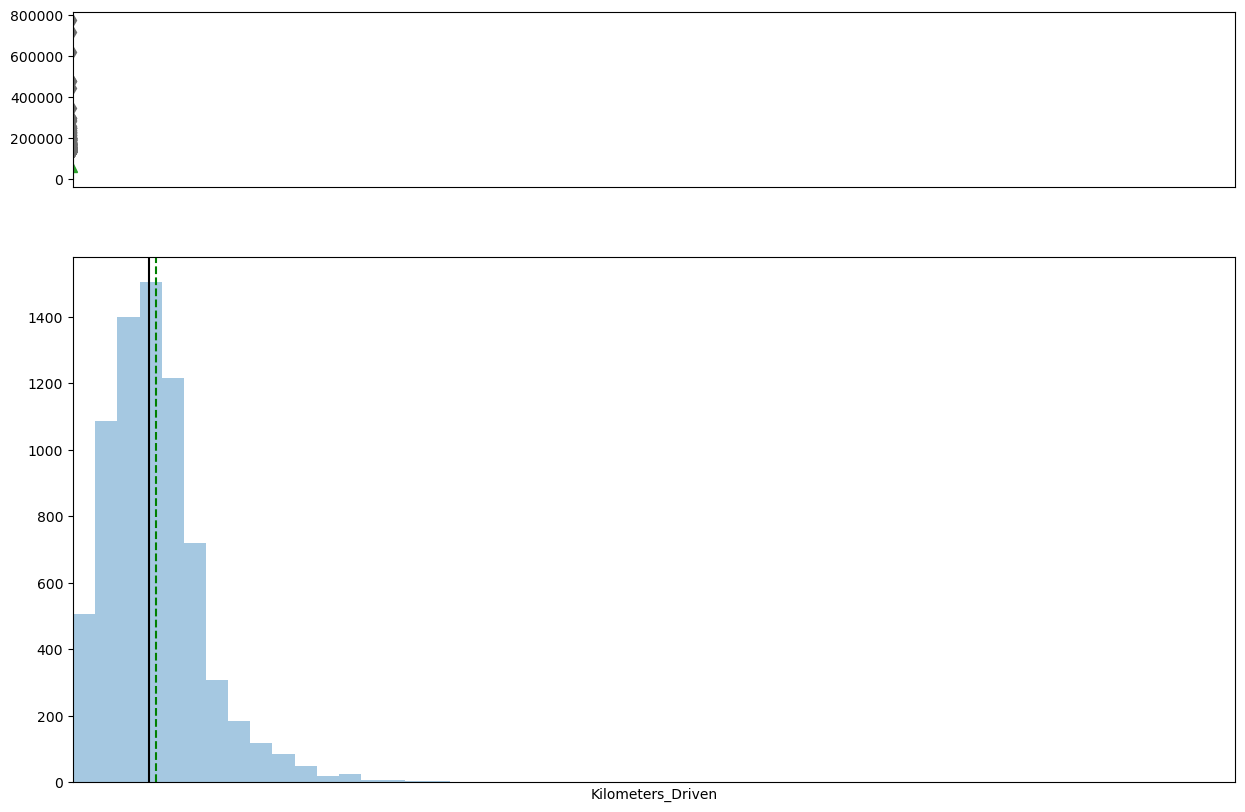

In [1290]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?
- Yes - we can use the Log transformation of the feature to reduce / remove the skewness.
- It is possible to keep the skewed data, however there are good reasons why reducing skeweness using log transformation is preferred. 
    - Model Assumptions
        - Many statistical models and machine learning lagorithms assume that the data follows a normal distribution. Skewed data can lead to biased results.
    - Model Performance
        - Reduced skewness can lead to better model performance especially in Linear Regression as this model work more effectively when tha target variable and features are normally distributed.
    - Interpretability
        - Log-transformed data can make the relationships between variables more interpretable and easier to understand.
    - Outliers
        - Log transformation can reduce the impact of extreme outliers.
    

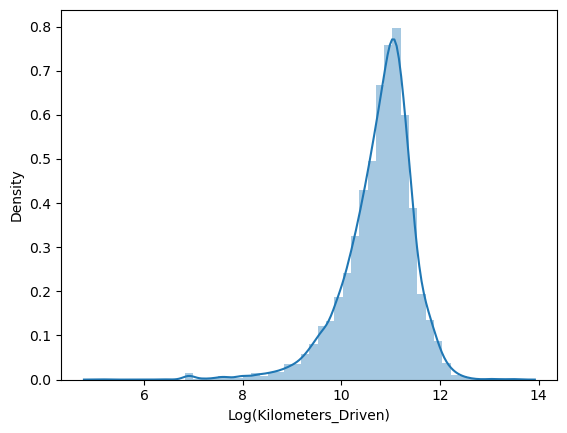

In [1291]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

#### **Observations and Insights:**
- More symmetric (normal) distribution after the log transformation.
- By taking the log of the data, the larger values were compressed thereby effectively reducing the right-skewness.

In [1292]:
# We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**.

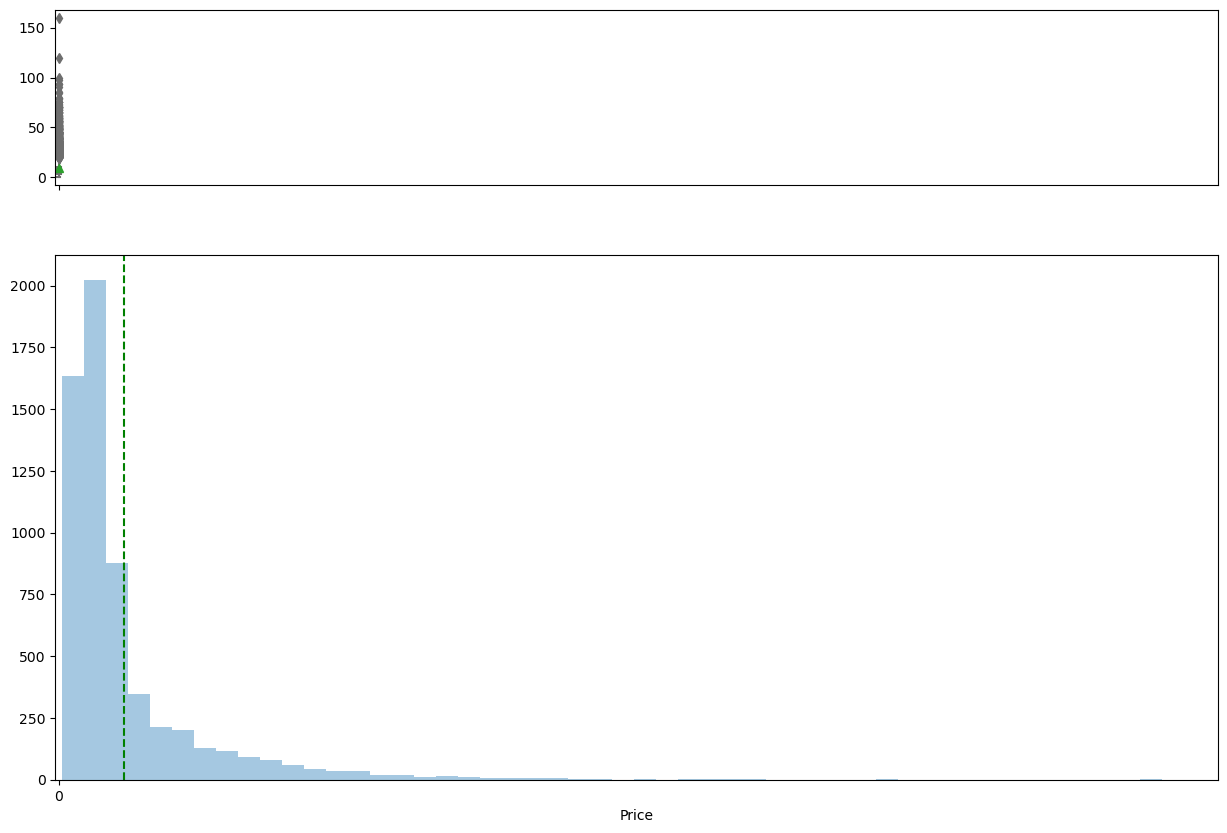

In [1293]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])

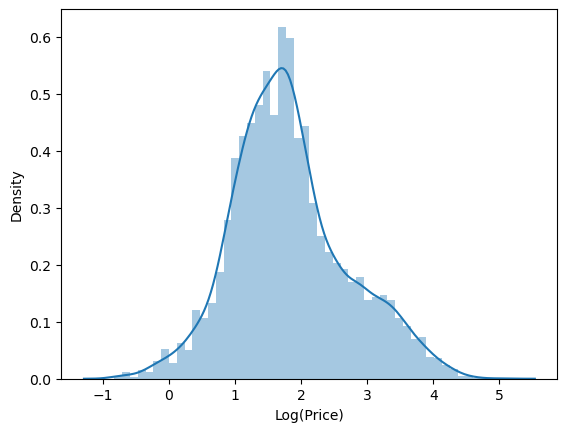

In [1294]:
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel = "Log(Price)");


In [1295]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

#### **Observations and Insights:**
- More symmetric (normal) distribution after the log transformation.
- By taking the log of the data, the larger values were compressed thereby effectively reducing the right-skewness.

**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

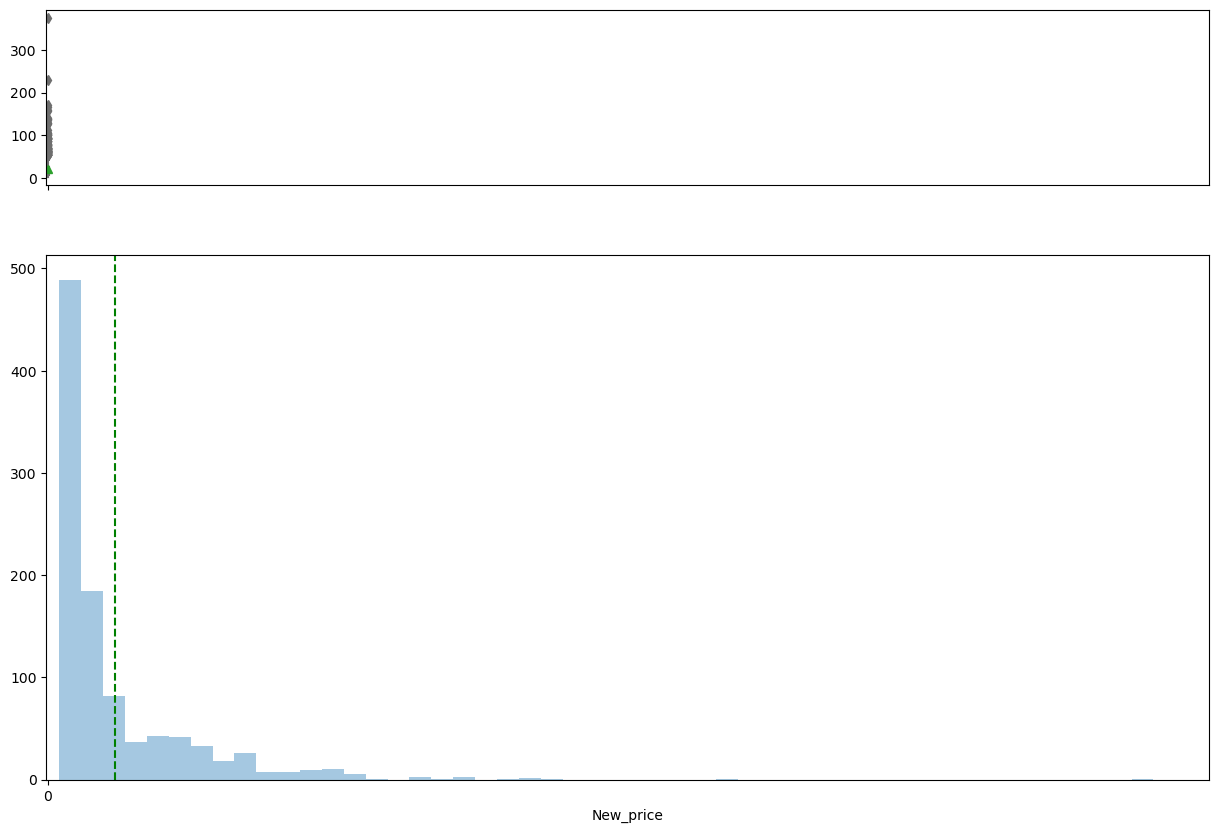

In [1296]:
# Plot histogram and box-plot for 'New_price'
histogram_boxplot(data['New_price'])

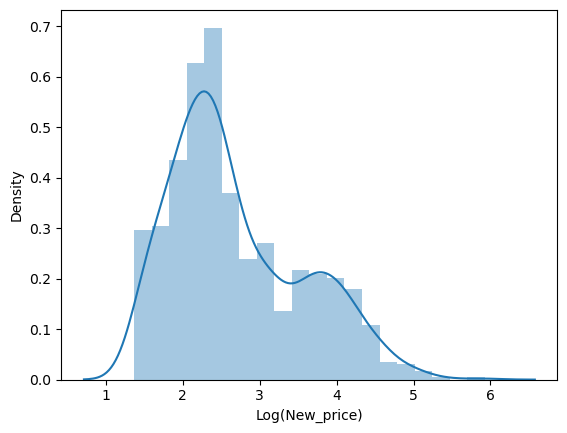

In [1297]:
# Log transformation of the feature 'New_price'
sns.distplot(np.log(data["New_price"]), axlabel = "Log(New_price)");

In [1298]:
# We can Add a transformed New_price feature in data
data["new_price_log"] = np.log(data["New_price"])

#### **Observations and Insights:**
- More symmetric (normal) distribution after the log transformation.
- By taking the log of the data, the larger values were compressed thereby effectively reducing the right-skewness.

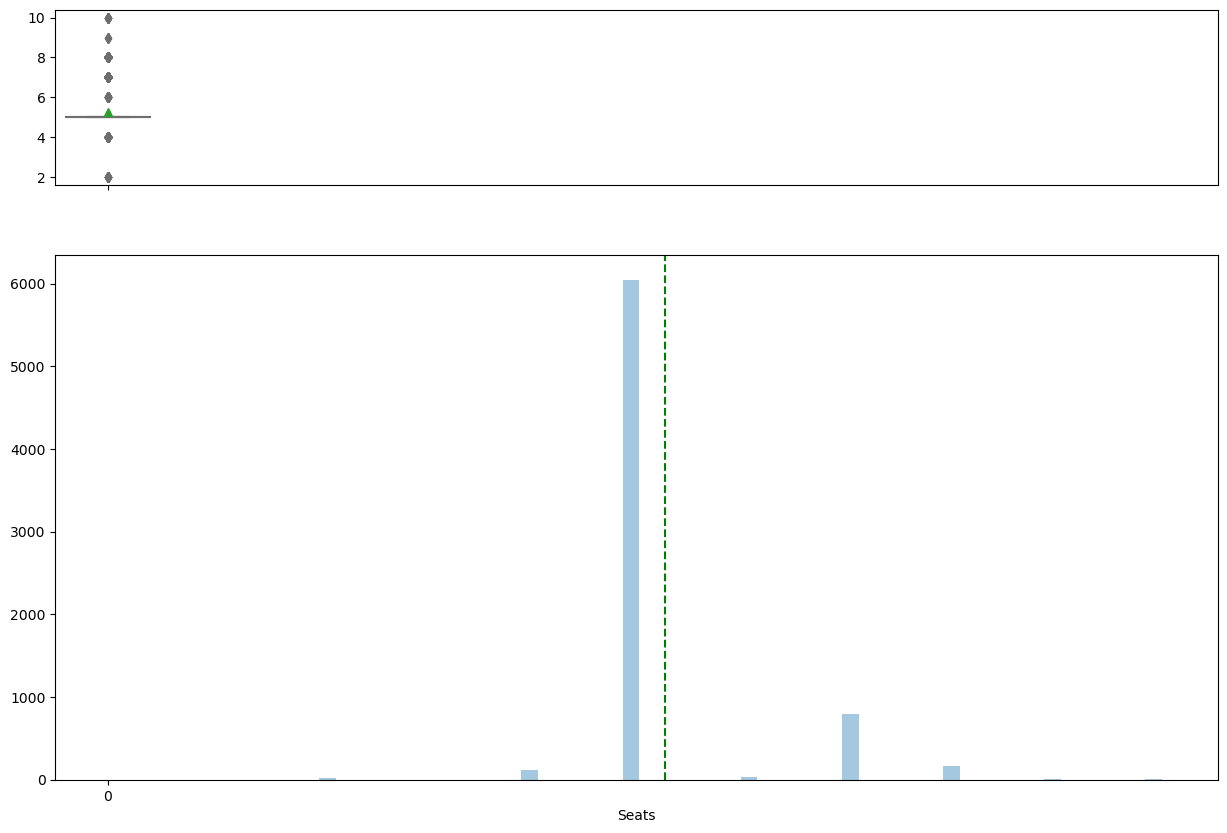

In [1299]:
# Plot histogram and box-plot for 'Seats'
histogram_boxplot(data['Seats'])

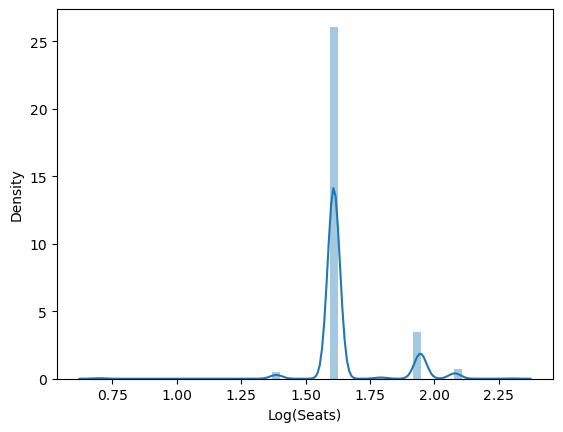

In [1300]:
# Log transformation of the feature 'Seats'
sns.distplot(np.log(data["Seats"]), axlabel = "Log(Seats)");

In [1301]:
# We can Add a transformed Seats feature in data
data["seats_log"] = np.log(data["Seats"])

#### **Observations and Insights:**
- More symmetric (normal) distribution after the log transformation.
- By taking the log of the data, the larger values were compressed thereby effectively reducing the right-skewness.

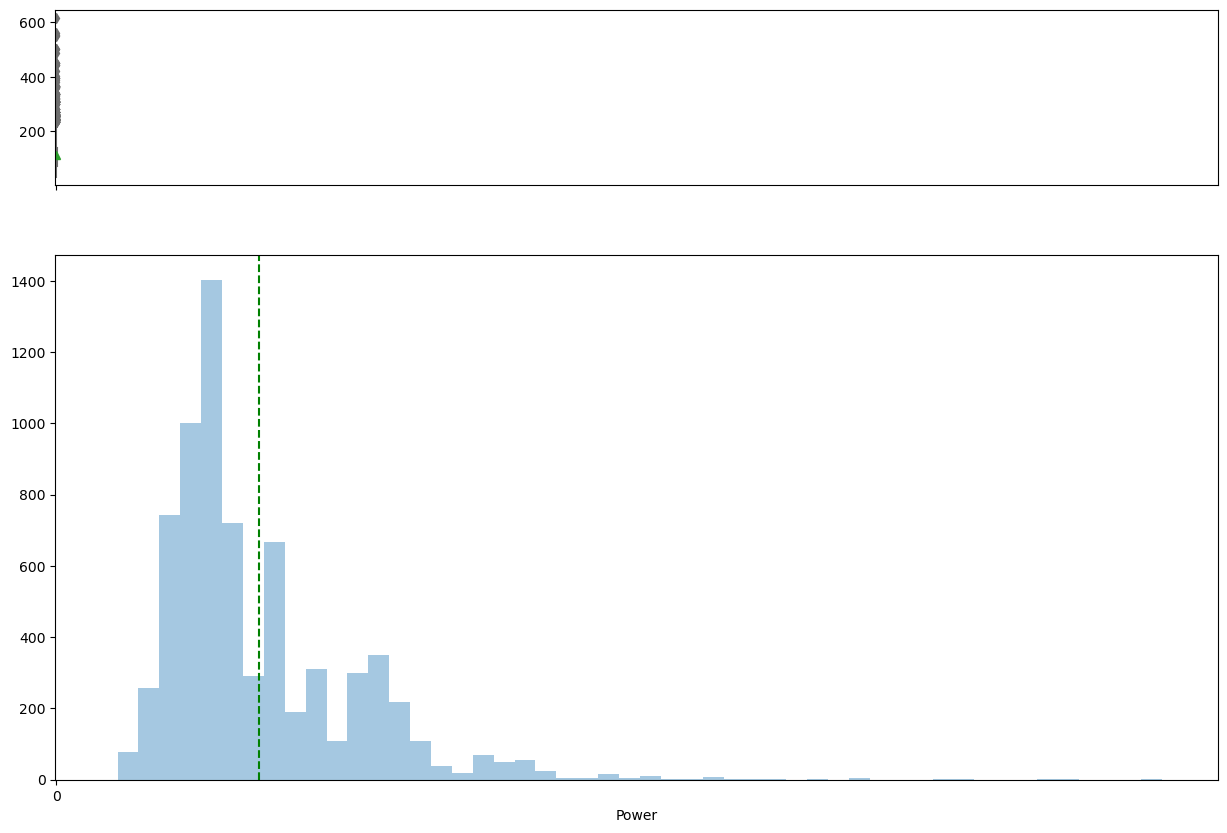

In [1302]:
# Plot histogram and box-plot for 'Power'
histogram_boxplot(data['Power'])

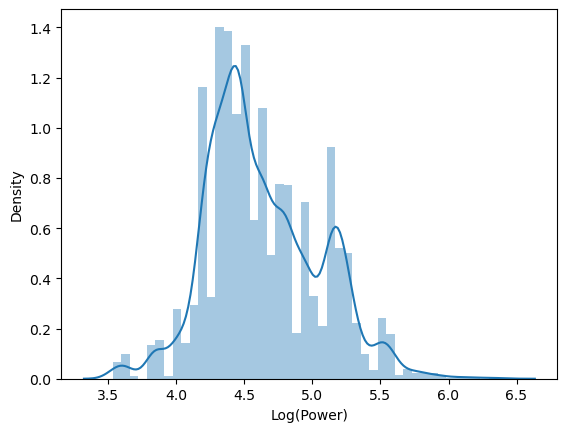

In [1303]:
# Log transformation of the feature 'Power'
sns.distplot(np.log(data["Power"]), axlabel = "Log(Power)");

In [1304]:
# We can Add a transformed Power feature in data
data["power_log"] = np.log(data["Power"])

#### **Observations and Insights:**
- More symmetric (normal) distribution after the log transformation.
- By taking the log of the data, the larger values were compressed thereby effectively reducing the right-skewness.

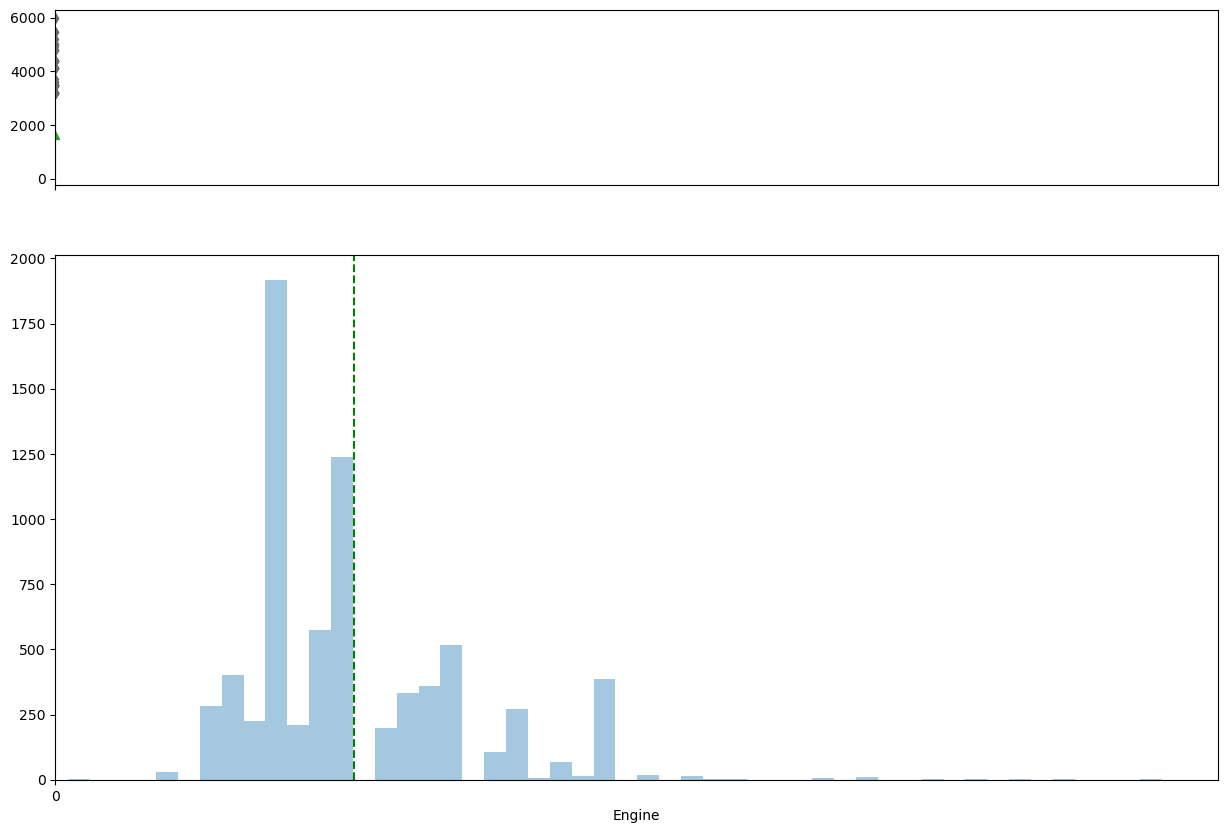

In [1305]:
# Plot histogram and box-plot for 'Engine'
histogram_boxplot(data['Engine'])

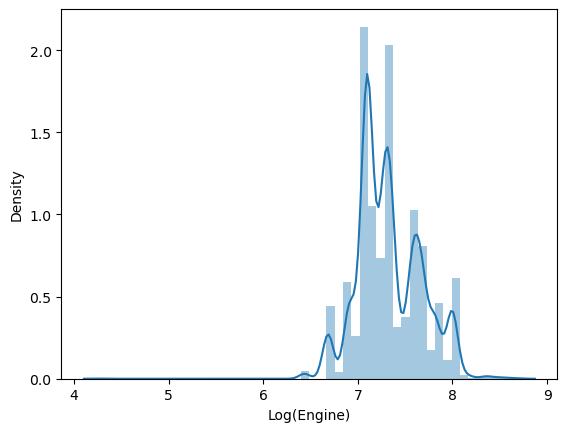

In [1306]:
# Log transformation of the feature 'Engine'
sns.distplot(np.log(data["Engine"]), axlabel = "Log(Engine)");

In [1307]:
# We can Add a transformed Engine feature in data
data["engine_log"] = np.log(data["Engine"])

#### **Observations and Insights:**
- More symmetric (normal) distribution after the log transformation.
- By taking the log of the data, the larger values were compressed thereby effectively reducing the right-skewness.

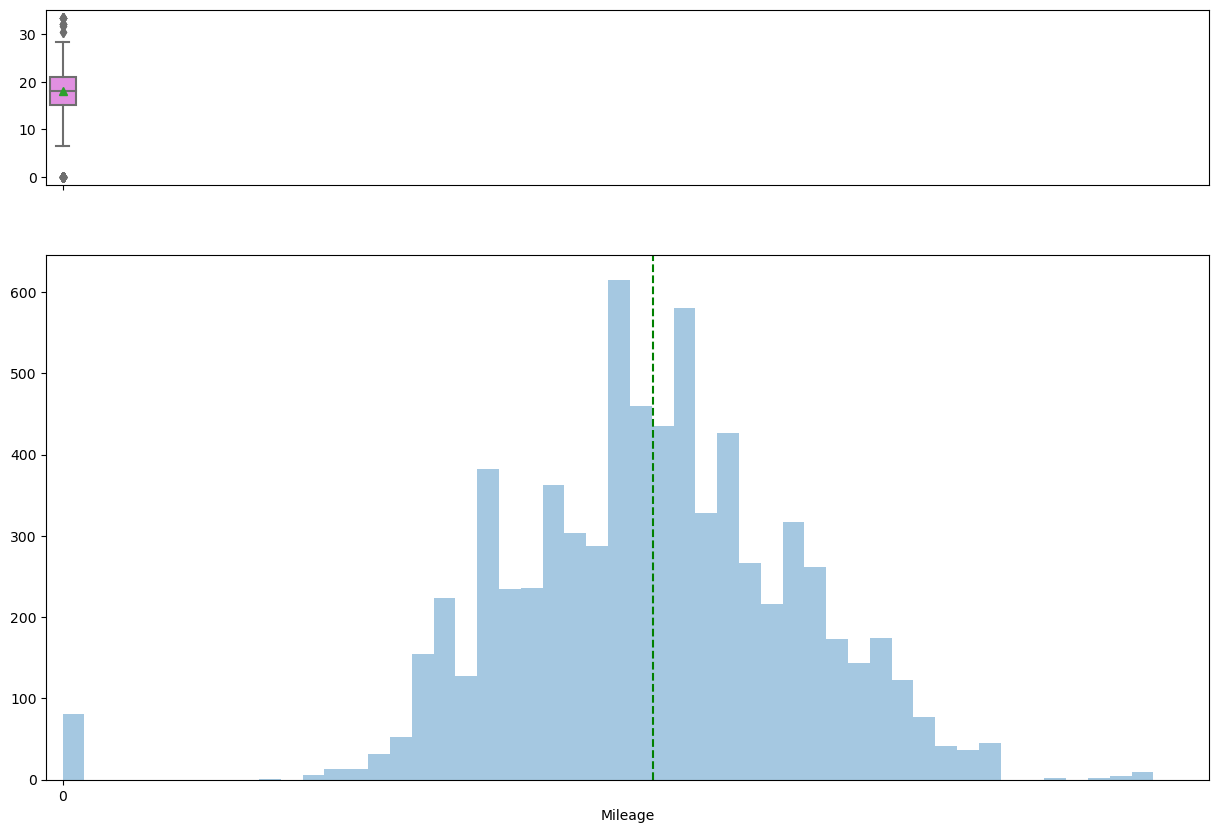

In [1308]:
# Plot histogram and box-plot for 'Mileage'
histogram_boxplot(data['Mileage'])

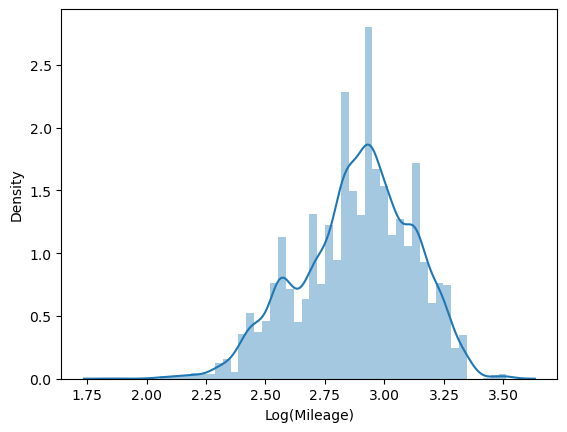

In [1309]:
# I got this error when I tried to get the log of Mileage - 'OverflowError: cannot convert float infinity to integer'
# I need to handle this error first before I can get the log value of Mileage
# One solution to handle this is to drop the rows with 0 or negative value in 'Mileage'
mileage_filtered = data[data['Mileage'] > 0]

# Log transformation of the feature 'Mileage'
sns.distplot(np.log(mileage_filtered["Mileage"]), axlabel = "Log(Mileage)");

In [1310]:
# We can Add a transformed Mileage feature in data
data["mileage_log"] = np.log(data["Mileage"])

#### **Observations and Insights:**
- More symmetric (normal) distribution after the log transformation.
- By taking the log of the data, the larger values were compressed thereby effectively reducing the right-skewness.

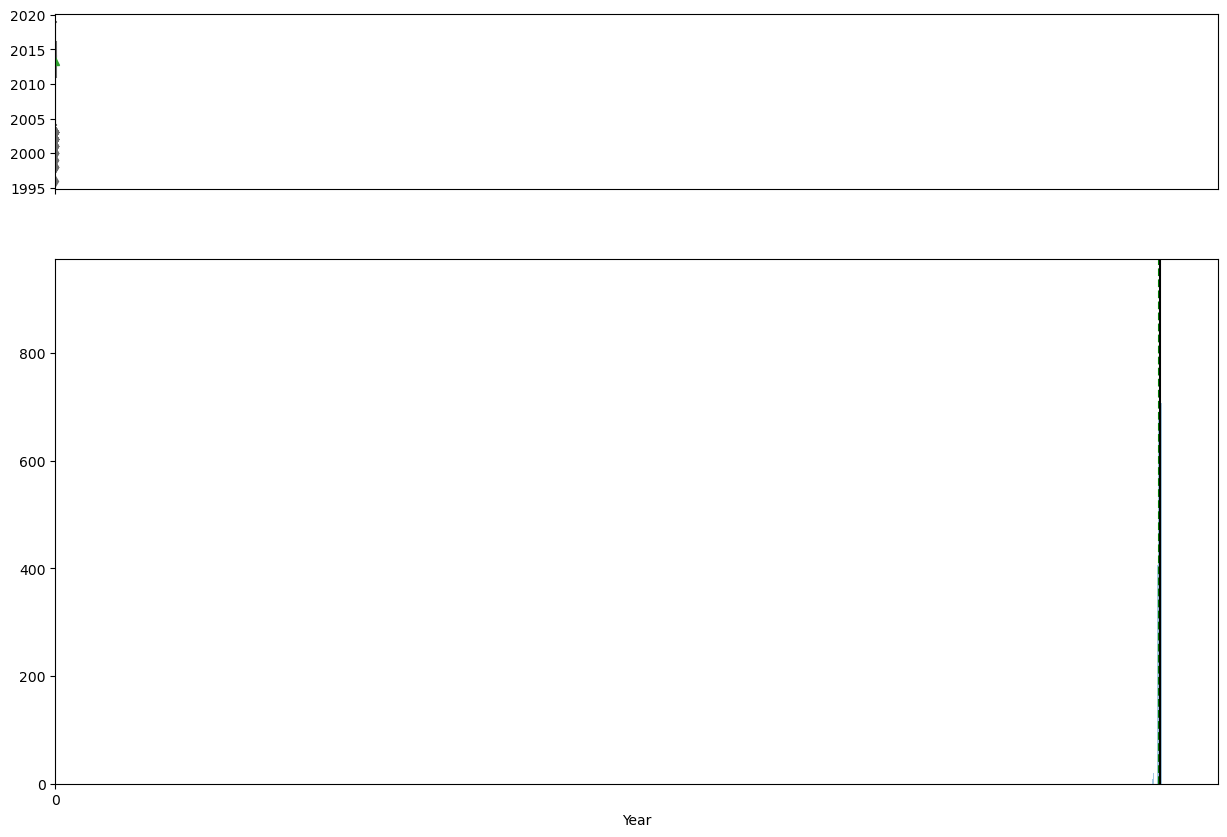

In [1311]:
# Plot histogram and box-plot for 'Year'
histogram_boxplot(data['Year'])

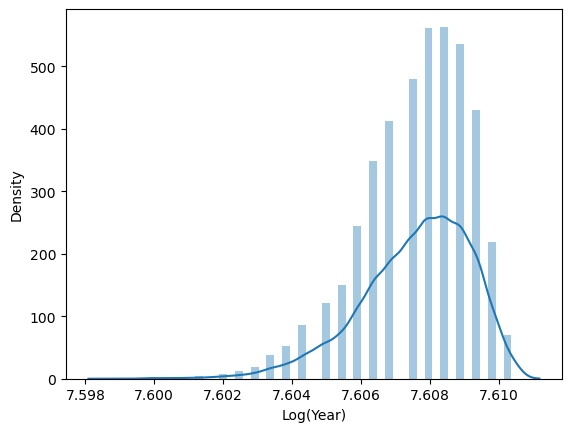

In [1312]:
# Log transformation of the feature 'Year'
sns.distplot(np.log(mileage_filtered["Year"]), axlabel = "Log(Year)");

In [1313]:
# We can Add a transformed Year feature in data
data["year_log"] = np.log(data["Year"])

#### **Observations and Insights:**
- More symmetric (normal) distribution after the log transformation.
- By taking the log of the data, the larger values were compressed thereby effectively reducing the right-skewness.

## **2. Univariate analysis - Categorical Data**

In [1314]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

# def perc_on_bar(data, z):
#     '''
#     plot
#     feature: categorical feature
#     the function won't work if a column is passed in hue parameter
#     '''

#     total = len(data[z]) # Length of the column
    
#     plt.figure(figsize = (15, 5))
    
#     ax = sns.countplot(data[z], palette = 'Paired', order = data[z].value_counts().index)
    
#     for p in ax.patches:
        
#         percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
#         x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
#         y = p.get_y() + p.get_height()           # Hieght of the plot
        
#         ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
#     plt.show() # Show the plot






def perc_on_bar(data, z):
    '''
    Plot
    feature: categorical feature
    The function won't work if a column is passed in the hue parameter
    '''

    # Convert 'Location' column to string type (if not already)
    data[z] = data[z].astype(str)

    # Remove missing values (if any)
    data = data.dropna(subset=[z])

    # Calculate the percentage for each category
    category_counts = data[z].value_counts()
    total = len(data[z])
    percentages = [(count / total) * 100 for count in category_counts]

    plt.figure(figsize=(15, 5))

    # Generate a list of colors using the 'Pastel' colormap
    colors = sns.color_palette('dark', len(category_counts))

    # Plot the bar chart
    ax = plt.bar(category_counts.index, category_counts.values, color=colors)

    # Annotate the percentage above each bar
    for i, p in enumerate(ax):
        percentage = '{:.1f}%'.format(percentages[i])
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        plt.annotate(percentage, (x, y), ha='center', va='bottom', size=10)

    plt.xlabel(z)
    plt.ylabel('Count')
    plt.title('Bar Plot of {}'.format(z))
    plt.xticks(rotation=90)
    plt.show()



**Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.**

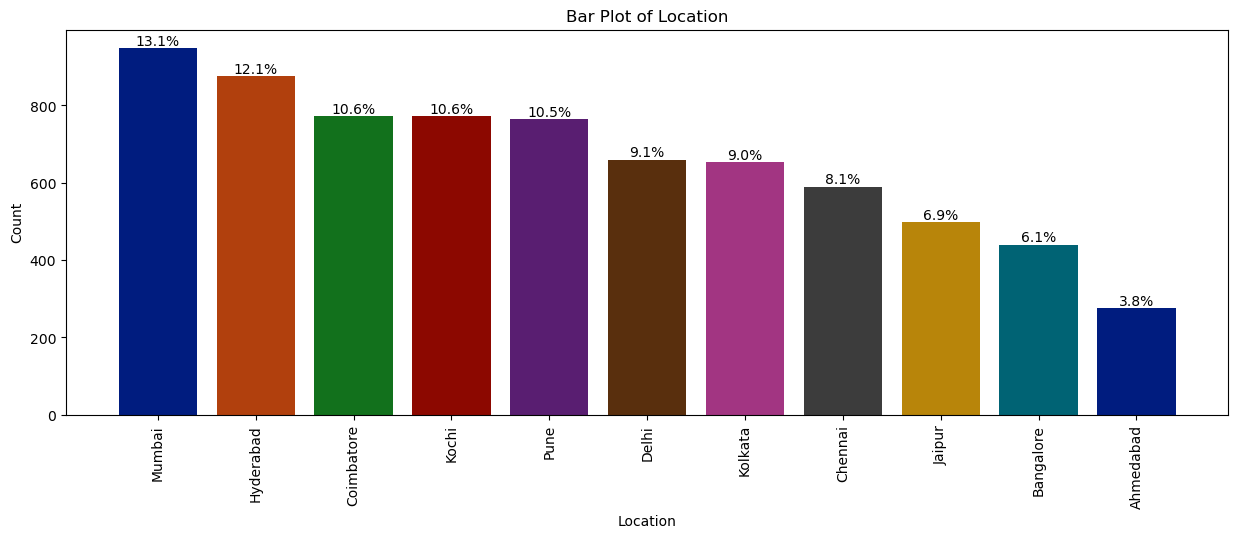

In [1315]:
# Bar Plot for 'Location'
perc_on_bar(data, 'Location')

**Observations and Insights:**
- The location where the most supply of used cars is located in Mumbai. It could be the price in this location is cheaper and therefore there is a high demand in this location. It could also be because Mumbai being the most populated city in India and therefore there is potential of higher demands compare to other location that has less population.
- The location where the least supply of used cars is located in Ahmedabad. It could be that the traffic in this location is bad compare to the other loacation and the people prefer to utilize the public transportation. Therefore, the demand in this location could be less. 

**Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`.

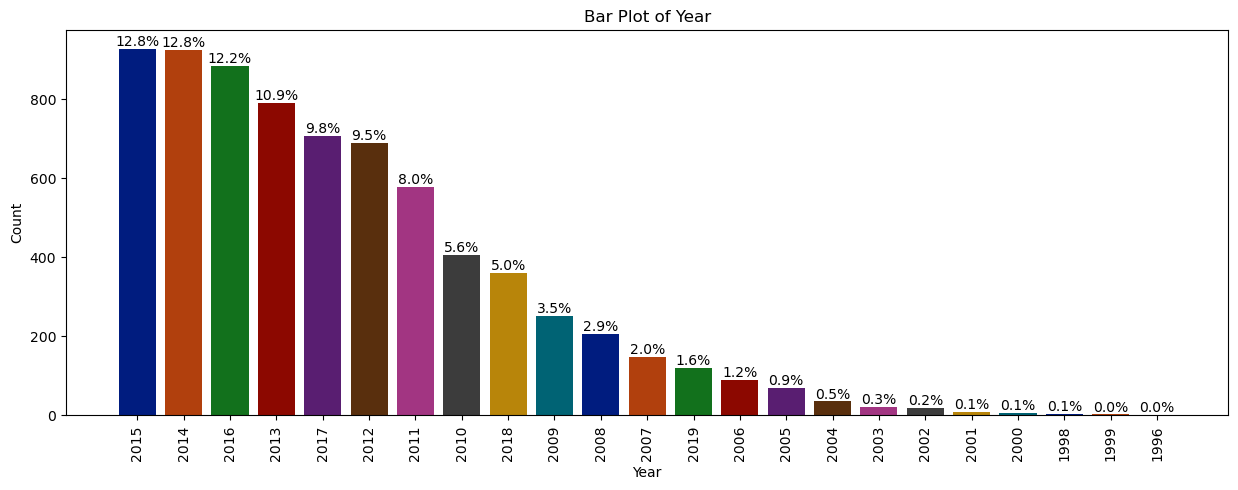

In [1316]:
# Bar Plot for 'Year'
perc_on_bar(data, 'Year')

**Observations and Insights:**
- Year 2015 and 2014 seems to be the most popular year model in India. 
- Newer used cars like 2019, 2018 are as popular. Perhaps the price difference compare to 2014 and 2015 is sigficant but other features/attributes are comparable.

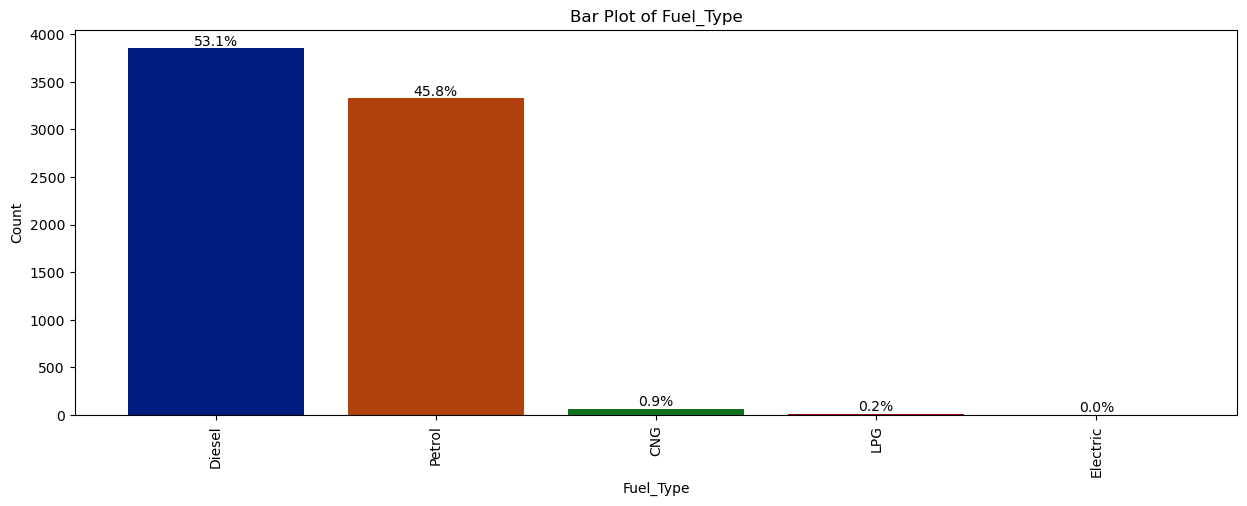

In [1317]:
# Bar Plot for 'Fuel_Type'
perc_on_bar(data, 'Fuel_Type')

**Observations and Insights:**
- As expected diesel and petrol is most common for used cars (and more than likely for new cars as well).
- No electric used cars in India as of yet. 
- The sigficantly low percentage for CNG and LPG might be India is trying phase out all vehicles with this fuel type.

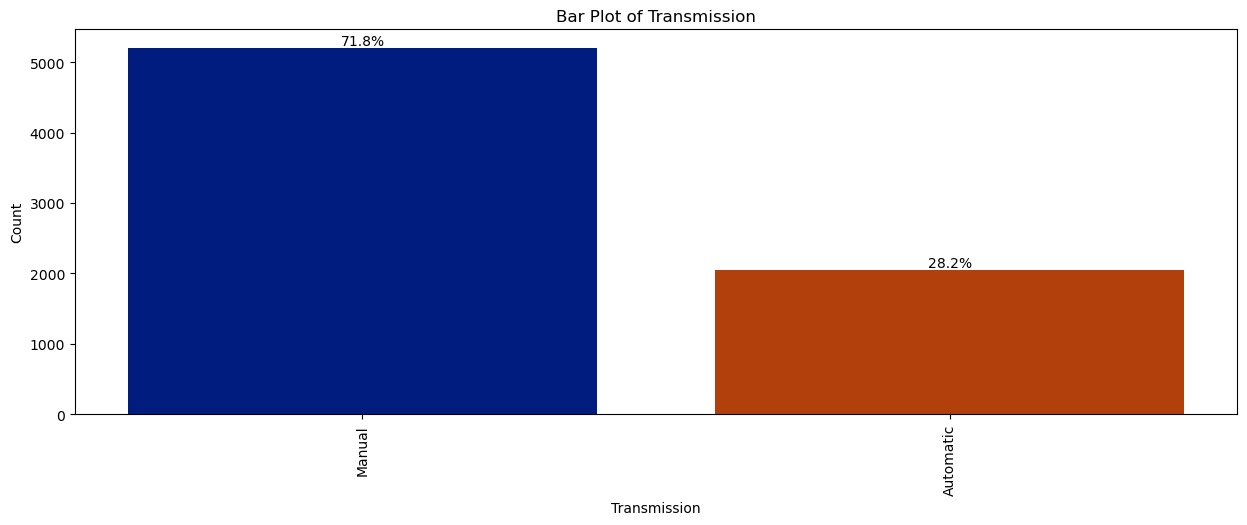

In [1318]:
# Bar Plot for 'Transmission'
perc_on_bar(data, 'Transmission')

**Observations and Insights:**
- Manual trasmission for used cars is significantly higher than the automatic transmission. It could be the price - automatic is more expensive than the manual transmission.

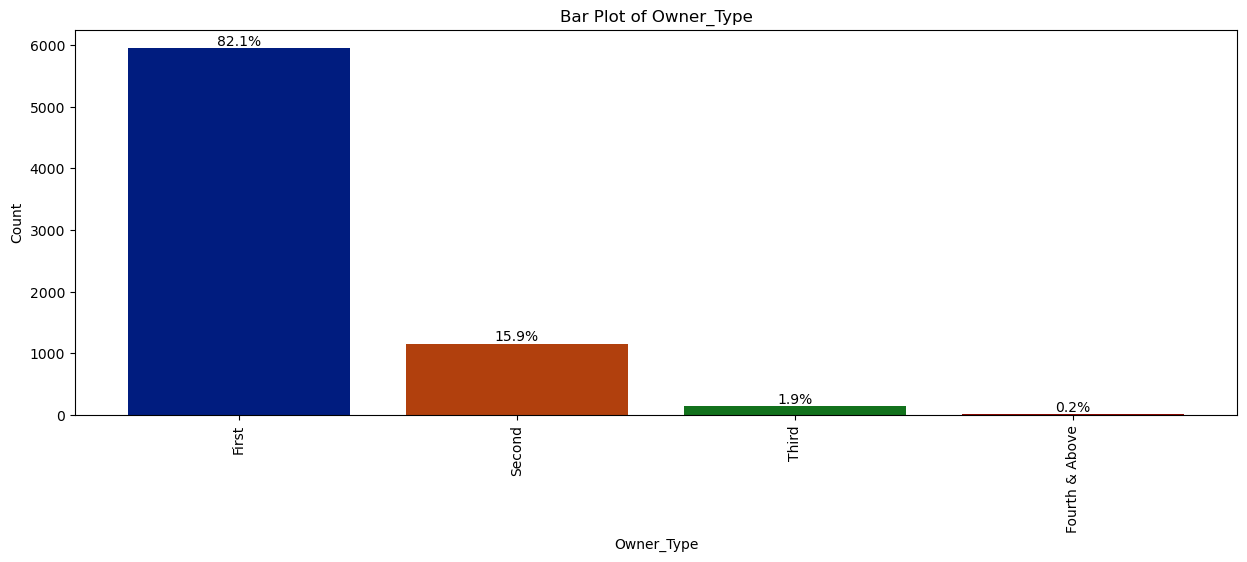

In [1319]:
# Bar Plot for 'Owner_Type'
perc_on_bar(data, 'Owner_Type')

**Observations and Insights:**
- The used cars with only one owner is signifcantly higher. This can be attributed to factors like potentially low kilometers, overall condition of the car is better compare to cars that has more than one owner.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

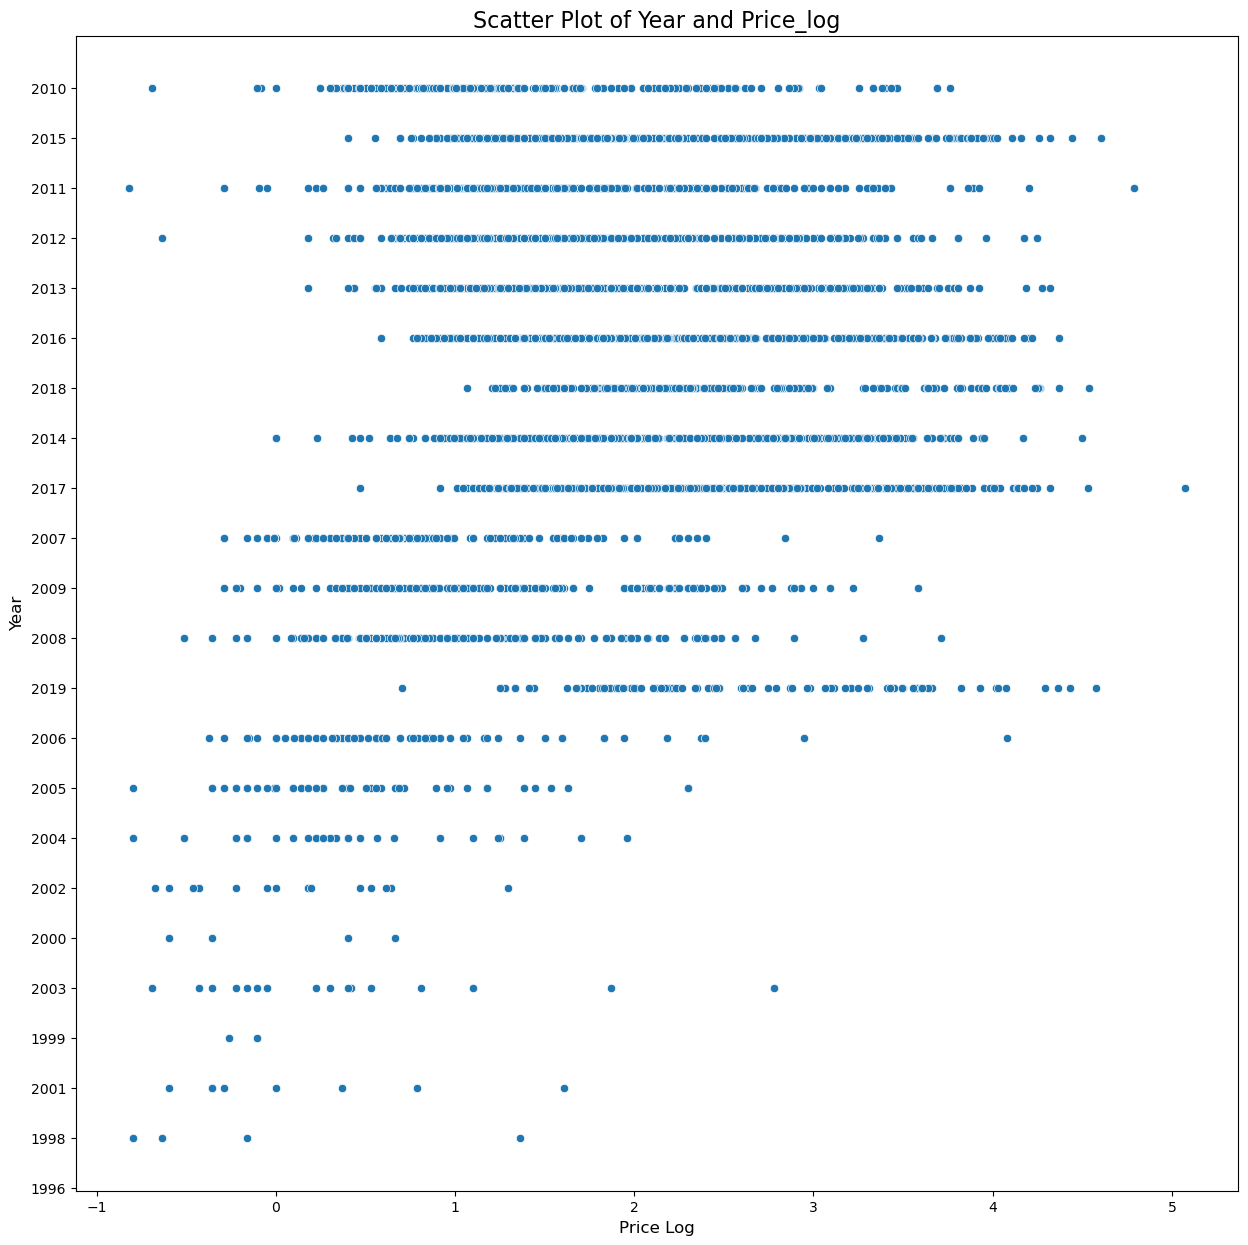

In [1320]:
# Let us plot pair plot for the variables 'year' and 'price_log'
plt.figure(figsize = (15, 15))
sns.scatterplot(data = data, x = 'price_log', y = 'Year')
plt.xlabel('Price Log', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.title('Scatter Plot of Year and Price_log', fontsize=16)

plt.show()




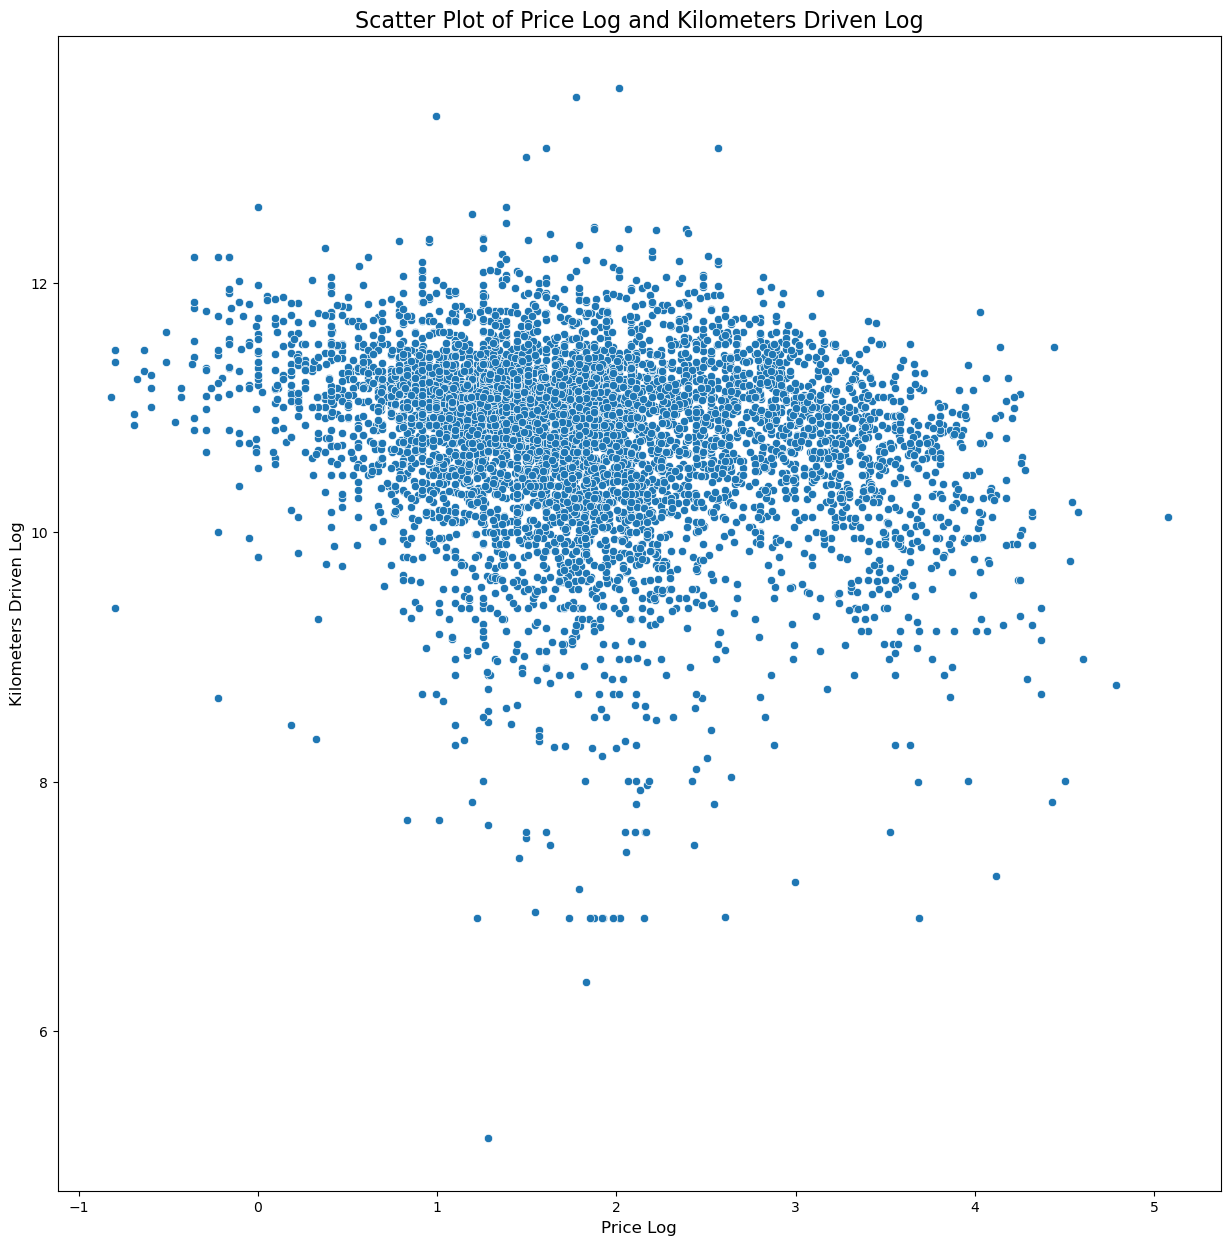

In [1321]:
# Let us plot pair plot for the variables 'price_log' and 'kilometers_driven_log'
plt.figure(figsize = (15, 15))
sns.scatterplot(data = data, x = 'price_log', y = 'kilometers_driven_log')
plt.xlabel('Price Log', fontsize=12)
plt.ylabel('Kilometers Driven Log', fontsize=12)
plt.title('Scatter Plot of Price Log and Kilometers Driven Log', fontsize=16)

plt.show()

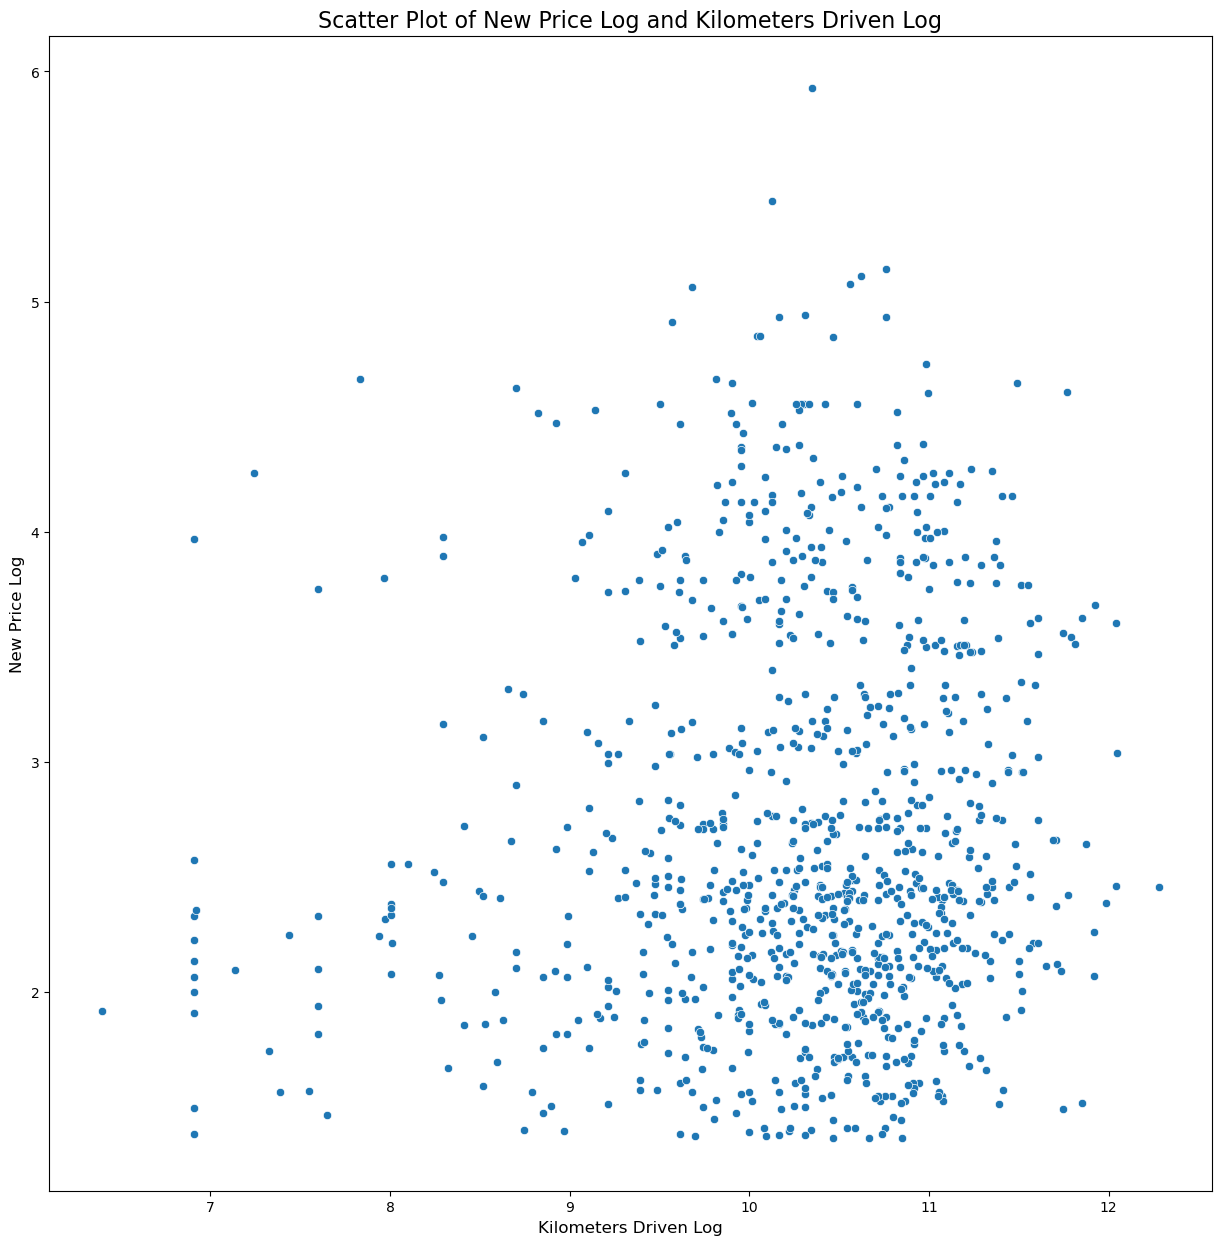

In [1322]:
# Let us plot pair plot for the variables 'new_price_log' and 'kilometers_driven_log'
plt.figure(figsize = (15, 15))
sns.scatterplot(data = data, y = 'new_price_log', x = 'kilometers_driven_log')
plt.ylabel('New Price Log', fontsize=12)
plt.xlabel('Kilometers Driven Log', fontsize=12)
plt.title('Scatter Plot of New Price Log and Kilometers Driven Log', fontsize=16)

plt.show()

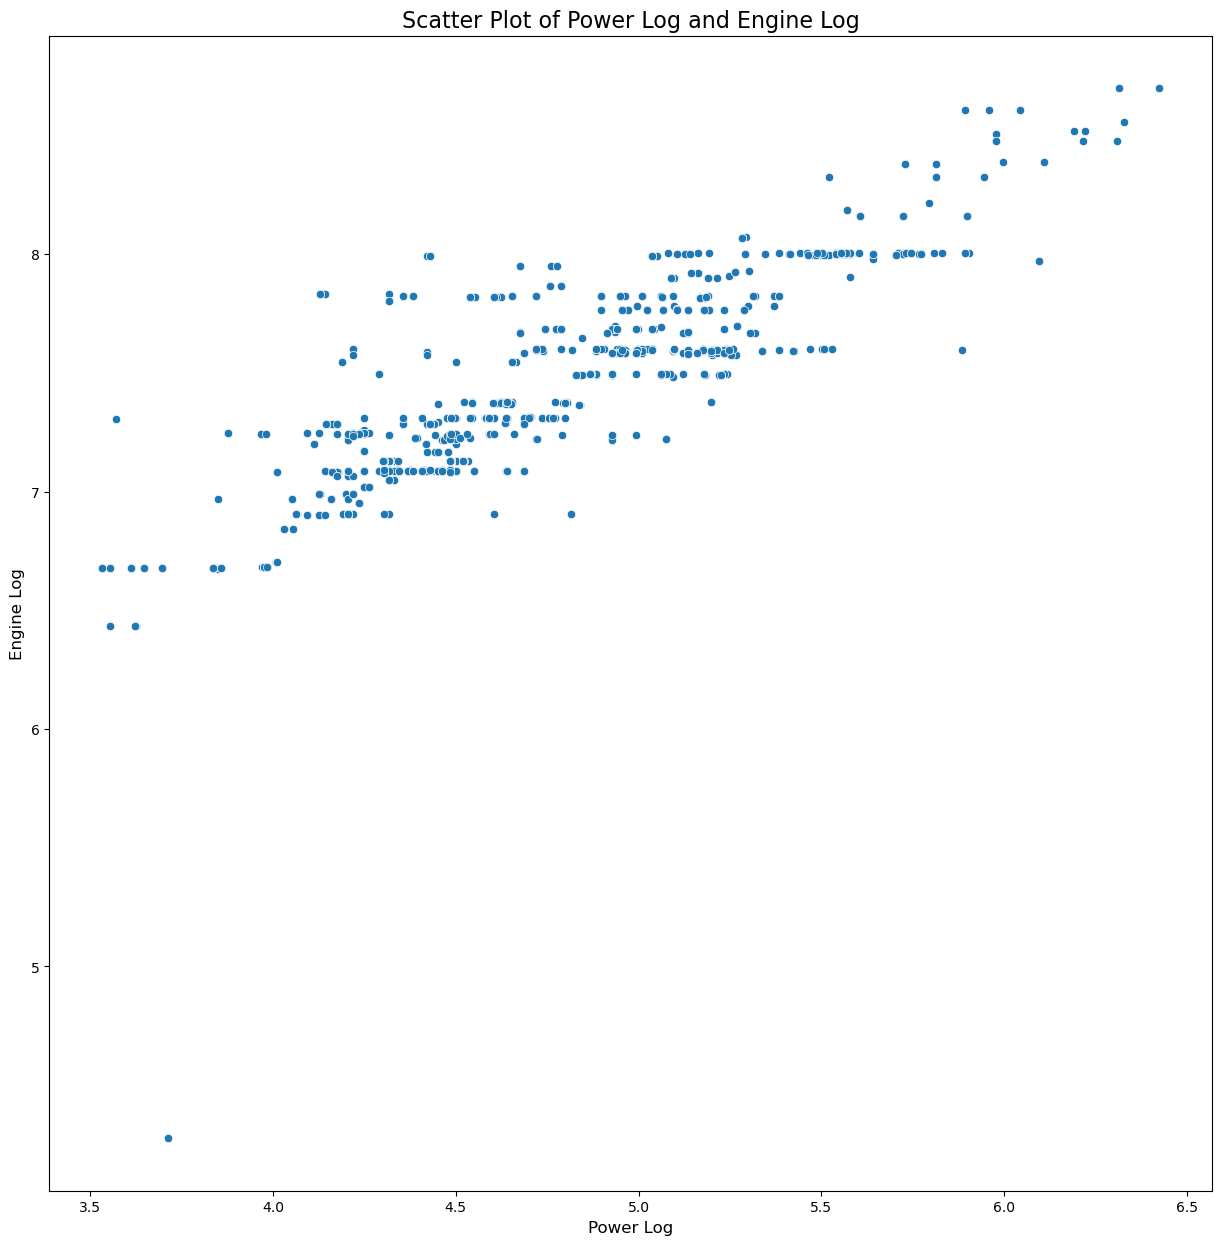

In [1323]:
# Let us plot pair plot for the variables 'new_price_log' and 'kilometers_driven_log'
plt.figure(figsize = (15, 15))
sns.scatterplot(data = data, x = 'power_log', y = 'engine_log')
plt.xlabel('Power Log', fontsize=12)
plt.ylabel('Engine Log', fontsize=12)
plt.title('Scatter Plot of Power Log and Engine Log', fontsize=16)

plt.show()

**Observations and Insights from all plots:**
- The higher the volume displacement of the engine of the car the higher the power. 
- The volume displacement of the engine of the car is directly proportional to the power of the car. 
- There are outliers in the dataset.

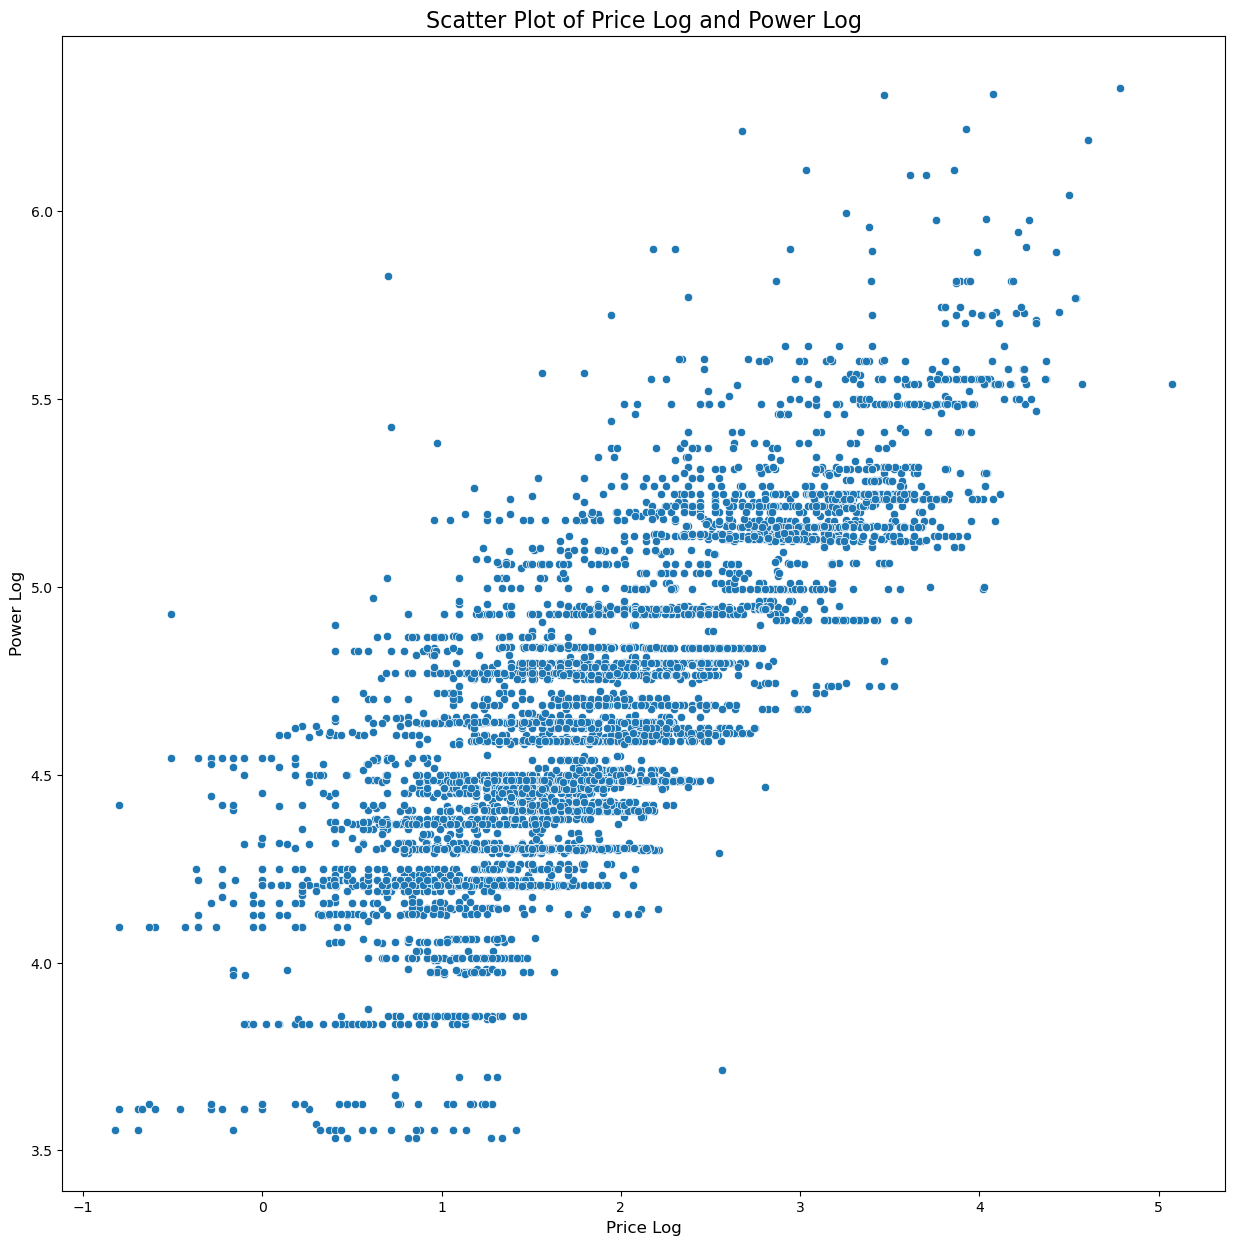

In [1324]:
# Let us plot pair plot for the variables 'price_log' and 'power_log'
plt.figure(figsize = (15, 15))
sns.scatterplot(data = data, x = 'price_log', y = 'power_log')
plt.xlabel('Price Log', fontsize=12)
plt.ylabel('Power Log', fontsize=12)
plt.title('Scatter Plot of Price Log and Power Log', fontsize=16)

plt.show()

**Observations and Insights from all plots:**
- The higher the power of the car the higher the price. 
- The power of the car is directly proportional to the price of the car. 
- There are outliers in the dataset.

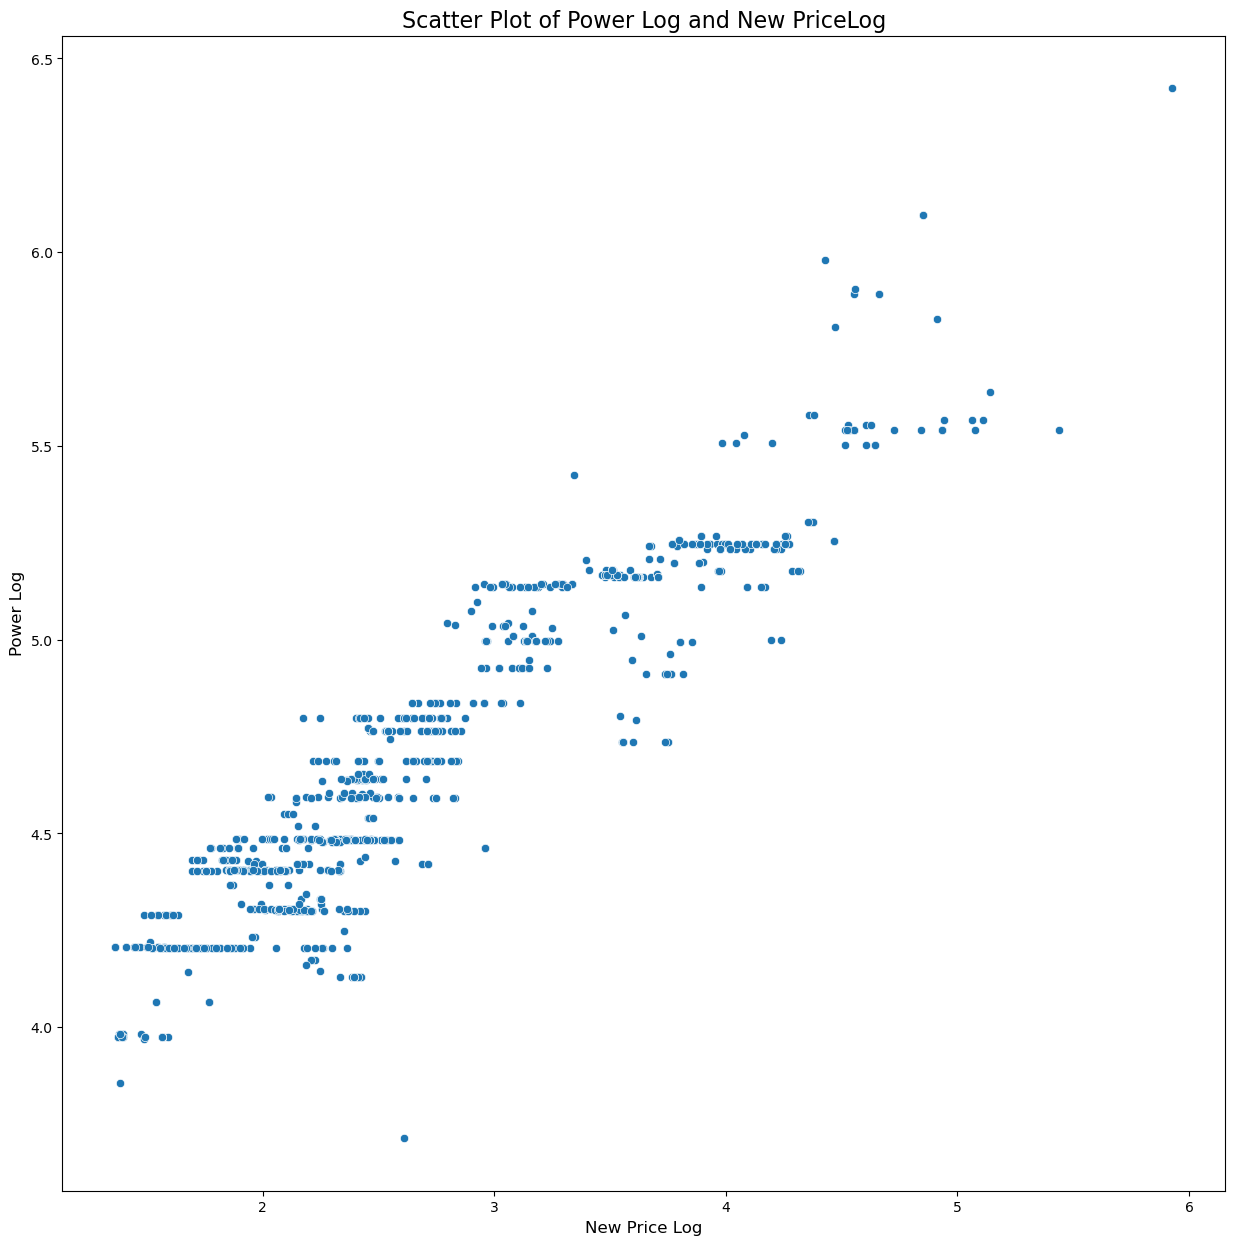

In [1325]:
# Let us plot pair plot for the variables 'new_price_log' and 'power_log'
plt.figure(figsize = (15, 15))
sns.scatterplot(data = data, x = 'new_price_log', y = 'power_log')
plt.xlabel('New Price Log', fontsize=12)
plt.ylabel('Power Log', fontsize=12)
plt.title('Scatter Plot of Power Log and New PriceLog', fontsize=16)

plt.show()

**Observations and Insights from all plots:**
- The higher the power of the car the higher the value of the new price. 
- The power of the car is directly proportional to the value of the new price. 
- There are outliers in the dataset.

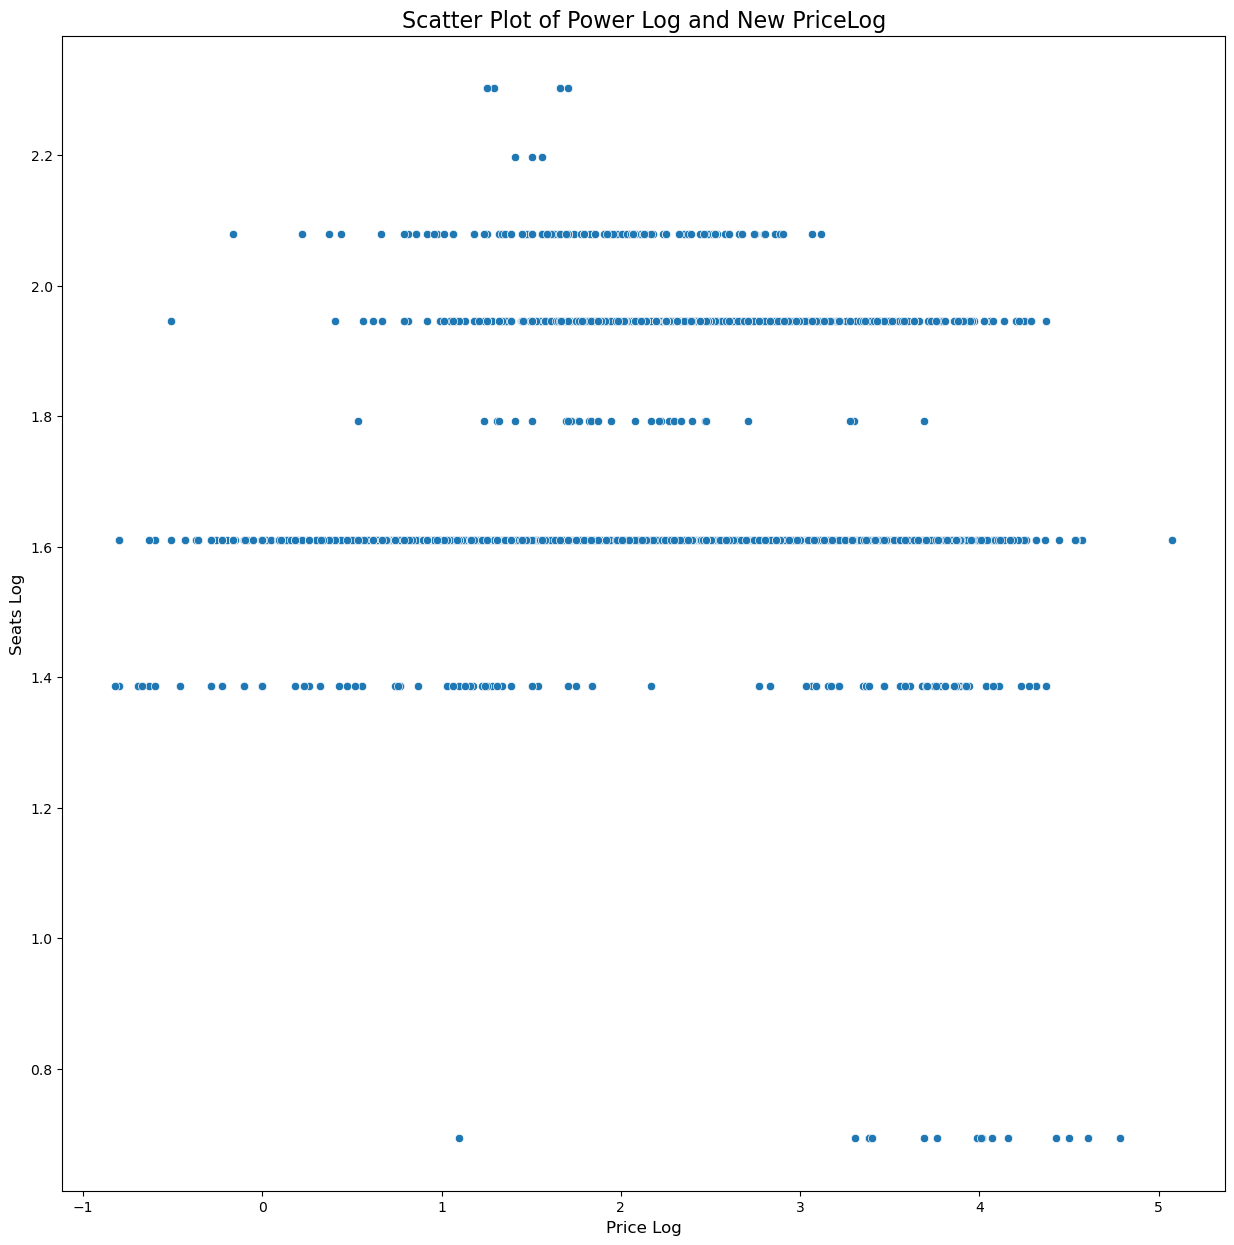

In [1326]:
# Let us plot pair plot for the variables 'price_log' and 'seats_log'
plt.figure(figsize = (15, 15))
sns.scatterplot(data = data, x = 'price_log', y = 'seats_log')
plt.xlabel('Price Log', fontsize=12)
plt.ylabel('Seats Log', fontsize=12)
plt.title('Scatter Plot of Power Log and New PriceLog', fontsize=16)

plt.show()

**Observations and Insights:**
- There is no obvious pattern between the price log and seats log. 
- There is no solid evidence that the number of seats affects the price of the car.
- There are outliers in the datasets.


### **2. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

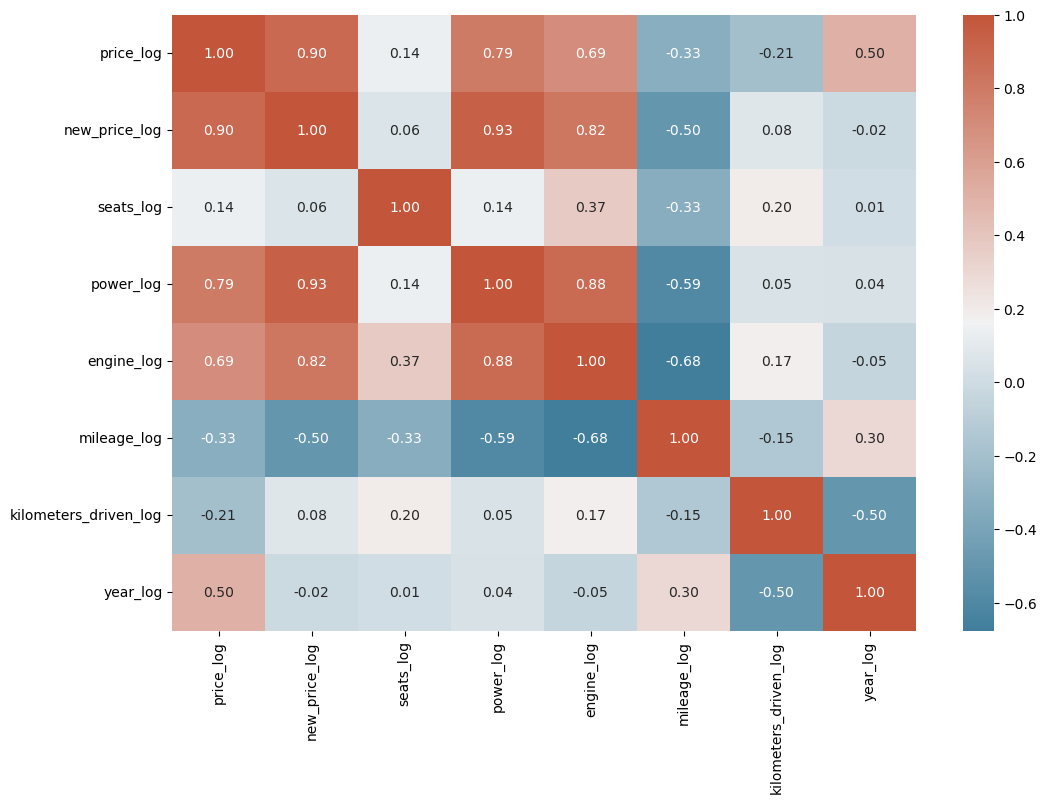

In [1327]:
# We can include the log transformation values and drop the original skewed data columns
columns_list = ['price_log', 'new_price_log', 'seats_log', 'power_log', 'engine_log', 'mileage_log', 'kilometers_driven_log', 'year_log']
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(data[columns_list].corr(), annot = True, fmt = '.2f', cmap = cmap)

# sns.heatmap(data.drop([________],axis = 1).corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

**Observations and Insights:**
- -0.6 represents a strong negative correlation
- +1 represents a strong positive correlation
- 0 represents no correlation

1. price_log VS year_log, price_log VS engine_log, price_log VS power_log, price_log VS seats_log, price_log VS new_price_log - positive correlation
2. price_log VS kilometers_driven_log, price_log VS mileage_log - negative correlation
3. new_price_log VS kilometers_driven_log,  new_price_log VS engine_log,  new_price_log VS power_log,  new_price_log VS seats_log, price_log - positive correlation
4. new_price_log VS year_log,  new_price_log VS mileage_log - negative correlation
5. seats_log VS year_log, seats_log VS kilometers_driven_log, seats_log VS engine_log, seats_log VS power_log, seats_log VS new_price_log, seats_log VS  price_log - positive correlation
6. seats_log VS mileage_log - negative correlation
7. power_log VS year_log, power_log VS kilometers_driven_log, power_log VS engine_log, power_log VS seats_log, power_log VS new_price_log, power_log VS price_log - positive correlation
8. power_log VS mileage_log - negative correlation
9. engine_log VS kilometers_driven_log, engine_log VS power_log, engine_log VS seats_log, engine_log VS new_price_log, engine_log VS price - positive correlation
10. engine_log VS year_log, engine_log VS mileage_log - negative correlation
11. mileage_log VS year_log - positive correlation
12. mileage_log VS kilometers_driven_log, mileage_log VS engine_log, mileage_log VS power_log, mileage_log VS seats_log, mileage_log VS new_price_log, mileage_log VS price_log - negative correlation
13. kilometers_driven_log VS engine_log, kilometers_driven_log VS power_log, kilometers_driven_log VS seats_log, kilometers_driven_log VS new_price_log - positive correlation
14. kilometers_driven_log VS year_log, kilometers_driven_log VS mileage_log, kilometers_driven_log VS price_log - negative correlation
15. year_log VS mileage_log, year_log VS power_log, year_log VS seats_log, year_log VS price_log - positive correlation
16. year_log VS kilometers_driven_log, year_log VS engine_log, year_log VS new_price_log- negative correlation

### **3. Box plot**

In [1328]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

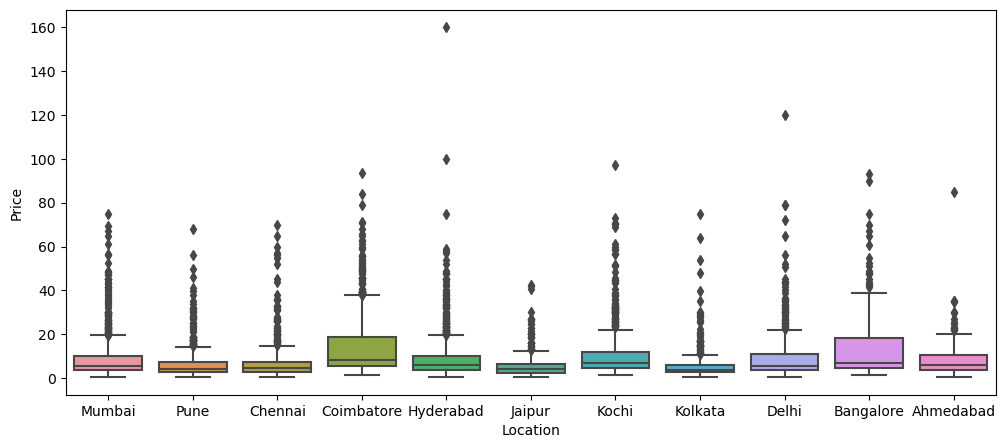

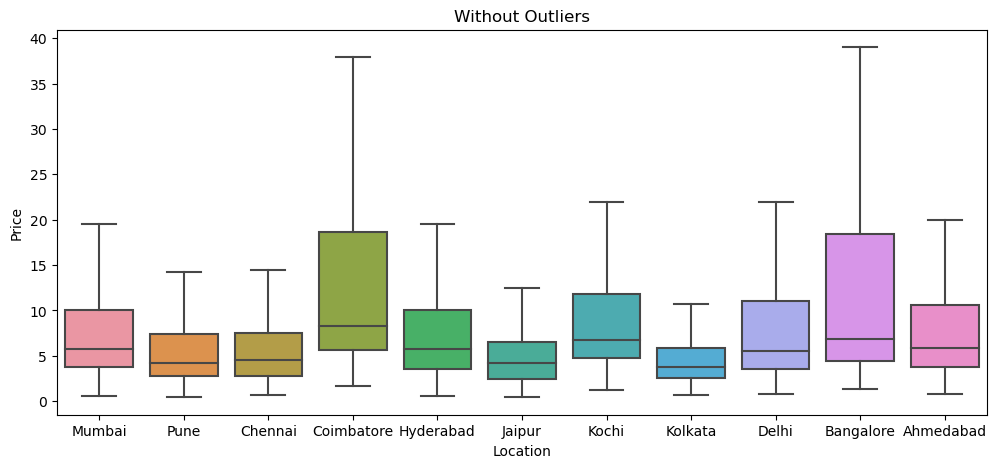

In [1329]:
# Box Plot: Price vs Location
boxplot(data['Location'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots:__**


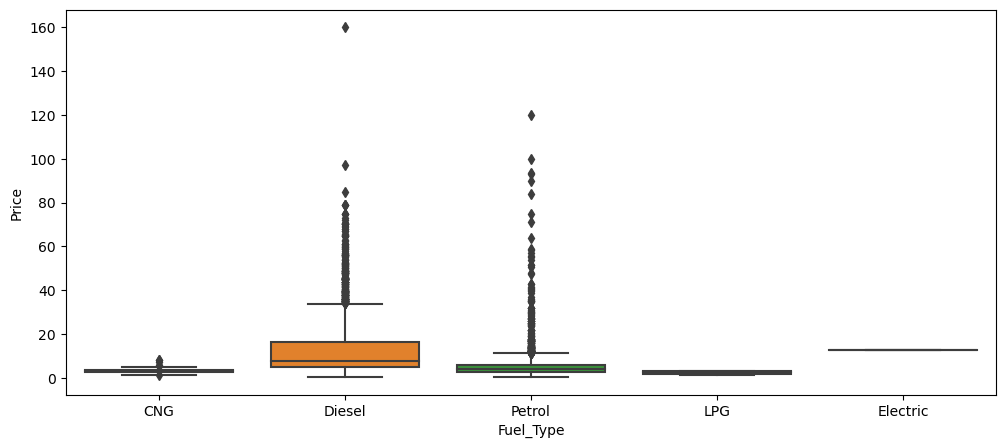

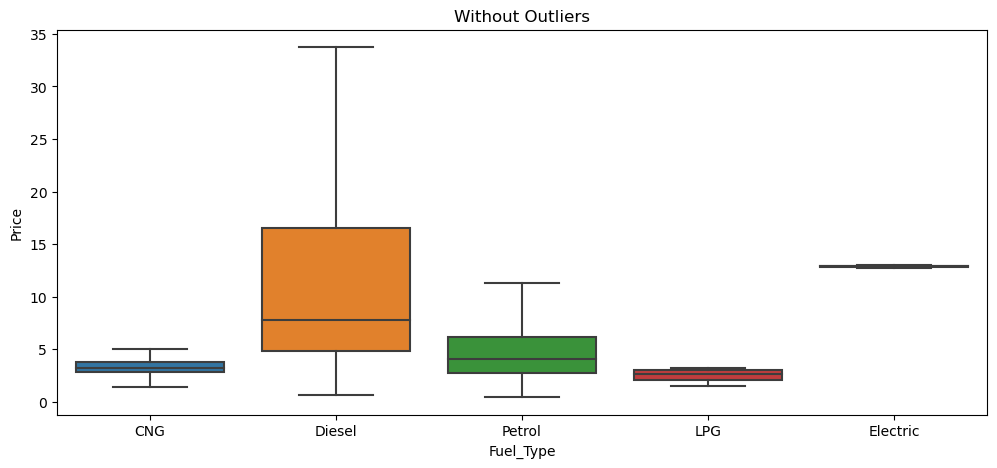

In [1330]:
# Box Plot: Price vs Location
boxplot(data['Fuel_Type'])

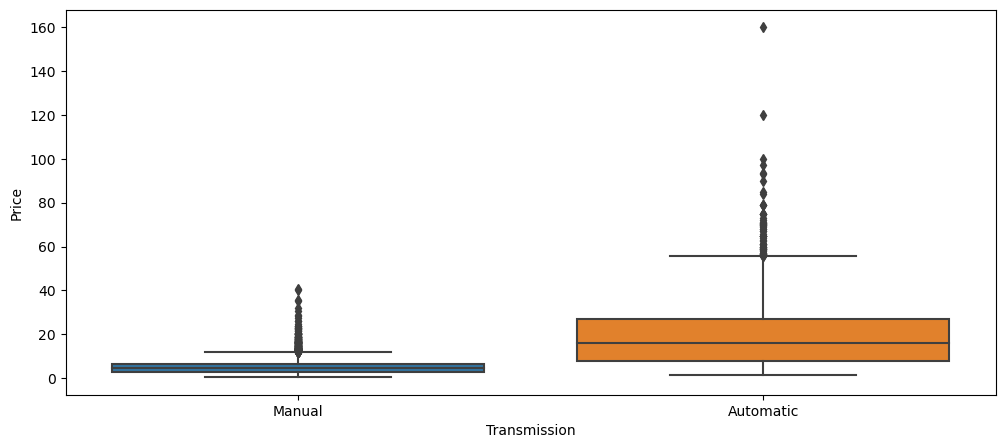

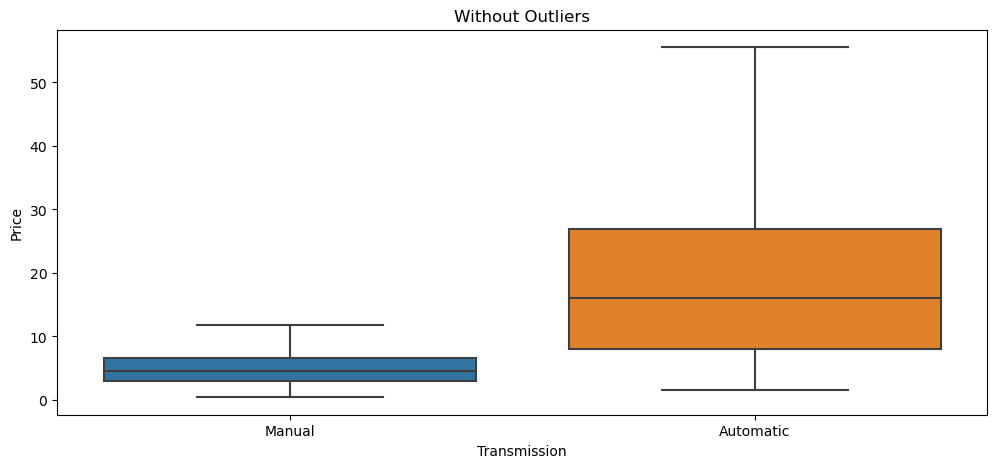

In [1331]:
# Box Plot: Price vs Transmission
boxplot(data['Transmission'])

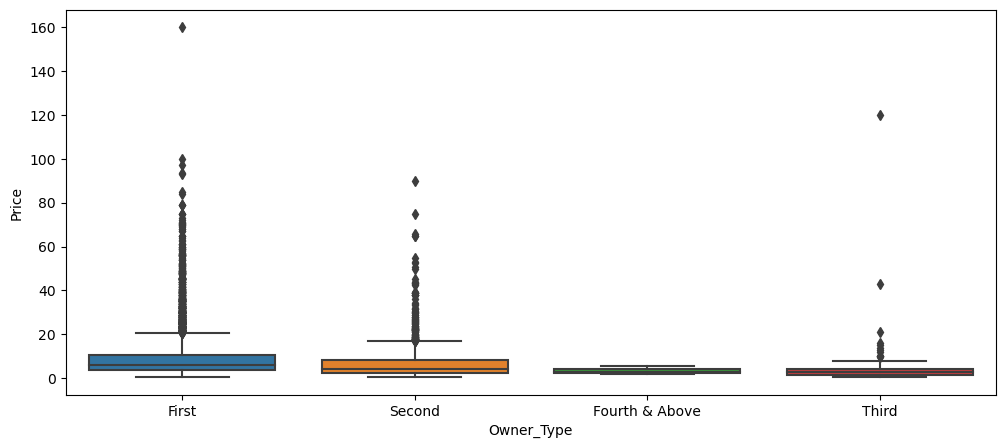

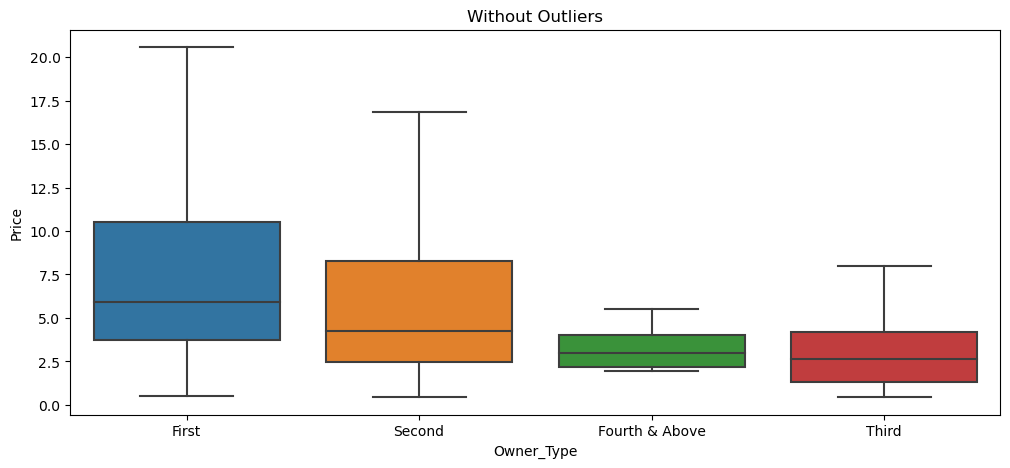

In [1332]:
# Box Plot: Price vs Owner Type
boxplot(data['Owner_Type'])

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

In [1333]:
# Split the 'Name' column into two separate columns for brand name and model name
data[['Brand', 'Model']] = data['Name'].str.split(' ', 1, expand=True)

# Display the updated DataFrame
print(data.head())


                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   

   New_price  Price  kilometers_driven_log  price_log  new_price_log  \
0        NaN   1.75              11.184421  

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [1334]:
# Extract Brand Names
data["Brand"] = data["Name"].apply(lambda x: x.split(" ")[0].lower())

In [1335]:
# Extract Model Names
data['Model'] = data['Name'].apply(lambda x: x.split(" ")[0].lower())

In [1336]:
# Sanity check
print(data.head())

                               Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0   

   New_price  Price  kilometers_driven_log  price_log  new_price_log  \
0        NaN   1.75              11.184421  

#### **Observations and Insights: _____**

### **Missing value treatment**

In [1337]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
new_price_log            6246
seats_log                  53
power_log                 175
engine_log                 46
mileage_log                 2
year_log                    0
Brand                       0
Model                       0
dtype: int64

#### **Observations and Insights:**
- The following has missing values (log value):
    - price_log, new_price_log, seats_log, power_log, engine_log, mileage_log


**Missing values in Seats**

In [1338]:
# Checking missing values in the column 'Seats'
missing_seats = data['Seats'].isnull().sum()
print("Number of missing values in 'Seats' column:", missing_seats)


Number of missing values in 'Seats' column: 53


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name.


In [1339]:
# Impute missing values in Seats,you can use fillna method in pandas
data['Seats'] = data['Seats'].fillna(data.groupby(['Brand', 'Model'])['Seats'].transform('median'))

In [1340]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
missing_seats = data['Seats'].isnull().sum()
print("Number of missing values in 'Seats' column:", missing_seats)


Number of missing values in 'Seats' column: 0


**Missing values for Mileage**

In [1341]:
# Now check missing values of each column. Hint: Use isnull() method
missing_mileage = data['Mileage'].isnull().sum()
print("Number of missing values in 'Mileage' column:", missing_mileage)

Number of missing values in 'Mileage' column: 2


In [1342]:
# Impute missing Mileage. For example, use can use median or any other methods.
data['Mileage'] = data['Mileage'].fillna(data.groupby(['Brand', 'Model'])['Mileage'].transform('median'))

# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
missing_mileage = data['Mileage'].isnull().sum()
print("Number of missing values in 'Mileage' column:", missing_mileage)

Number of missing values in 'Mileage' column: 0


**Missing values for Engine**

In [1343]:
# Impute missing values in the column Engine
data['Engine'] = data['Engine'].fillna(data.groupby(['Brand', 'Model'])['Engine'].transform('median'))

# Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_engine = data['Engine'].isnull().sum()
print("Number of missing values in 'Engine' column:", missing_engine)


Number of missing values in 'Engine' column: 0


**Missing values for Power**

In [1344]:
# Impute missing values in the column Power
data['Power'] = data['Engine'].fillna(data.groupby(['Brand', 'Model'])['Engine'].transform('median'))

# Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_power = data['Power'].isnull().sum()
print("Number of missing values in 'Power' column:", missing_power)

Number of missing values in 'Power' column: 0


**Missing values for New_price**

In [1345]:
# missing_new_price = data['New_price'].isnull().sum()
# print("Number of missing values in 'Seats' column:", missing_new_price)

# # Impute missing values in the column New_price
data['New_price'] = data['New_price'].fillna(data.groupby(['Brand', 'Model'])['New_price'].transform('median'))

# # Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_new_price = data['New_price'].isnull().sum()
print("Number of missing values in 'New Price' column:", missing_new_price)

Number of missing values in 'New Price' column: 159


In [1346]:
# # Impute missing values in the column New_price
data['Price'] = data['Price'].fillna(data.groupby(['Brand', 'Model'])['Price'].transform('median'))

# # Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_price = data['Price'].isnull().sum()
print("Number of missing values in 'Price' column:", missing_price)

Number of missing values in 'Price' column: 2


In [1413]:
data.describe().T

count          mean           std         min  \
Kilometers_Driven      7093.0  57685.026646  37613.958585  171.000000   
Mileage                7093.0     28.143794      4.573038   10.000000   
Engine                 7093.0   1620.528690    595.079590   72.000000   
Power                  7093.0   1620.528690    595.079590   72.000000   
Seats                  7093.0      5.278866      0.800663    2.000000   
New_price              7093.0     21.120646     24.209909    3.910000   
Price                  7093.0      9.366530     10.599894    0.440000   
kilometers_driven_log  7093.0     10.756838      0.716146    5.141664   
price_log              7093.0      1.846374      0.834100   -0.820981   
new_price_log          7093.0      2.661167      0.783373    1.363537   
seats_log              7093.0      1.653663      0.138144    0.693147   
power_log              7093.0      4.635609      0.412691    3.532226   
engine_log             7093.0      7.331280      0.338058    4.276666   
mileage_log            7093.0      3.322132      0.183261    2.302585   
year_log               7093.0      7.607584      0.001612    7.599902   

                                25%           50%           75%            max  
Kilometers_Driven      33750.000000  53000.000000  73000.000000  775000.000000  
Mileage                   25.170000     28.160000     31.100000      43.540000  
Engine                  1198.000000   1493.000000   1968.000000    5998.000000  
Power                   1198.000000   1493.000000   1968.000000    5998.000000  
Seats                      5.000000      5.000000      5.000000      10.000000  
New_price                  7.870000     11.105000     23.250000     375.000000  
Price                      3.850000      5.450000     10.000000     160.000000  
kilometers_driven_log     10.426736     10.878047     11.198215      13.560618  
price_log                  1.348073      1.695616      2.302585       5.075174  
new_price_log              2.063058      2.407383      3.146305       5.926926  
seats_log                  1.609438      1.609438      1.609438       2.302585  
power_log                  4.329944      4.543295      4.927471       6.423247  
engine_log                 7.088409      7.308543      7.584773       8.699181  
mileage_log                3.225653      3.337903      3.437208       3.773680  
year_log                   7.606885      7.607878      7.608871       7.610358

In [1348]:
# Add a value of for each row in mileage
def new_mileage_value(row):
    row['Mileage'] += 10
    return row


data = data.apply(new_mileage_value, axis = 1)
# Then create the mileage_log

In [1349]:
# We can Add a transformed Mileage feature in data
data["mileage_log"] = np.log(data["Mileage"])

In [1350]:
data.describe()

Kilometers_Driven      Mileage       Engine        Power        Seats  \
count        7252.000000  7252.000000  7252.000000  7252.000000  7252.000000   
mean        57810.852868    28.140750  1615.929950  1615.929950     5.279509   
std         37499.537277     4.562352   594.252411   594.252411     0.807703   
min           171.000000    10.000000    72.000000    72.000000     2.000000   
25%         34000.000000    25.170000  1198.000000  1198.000000     5.000000   
50%         53404.000000    28.160000  1493.000000  1493.000000     5.000000   
75%         73000.000000    31.100000  1968.000000  1968.000000     5.000000   
max        775000.000000    43.540000  5998.000000  5998.000000    10.000000   

         New_price        Price  kilometers_driven_log    price_log  \
count  7093.000000  7250.000000            7252.000000  6018.000000   
mean     21.120646     9.245866              10.760299     1.824705   
std      24.209909    10.608096               0.714036     0.873606   
min       3.910000     0.440000               5.141664    -0.820981   
25%       7.870000     3.750000              10.434116     1.252763   
50%      11.105000     5.350000              10.885641     1.729884   
75%      23.250000     9.887500              11.198215     2.297573   
max     375.000000   160.000000              13.560618     5.075174   

       new_price_log    seats_log    power_log   engine_log  mileage_log  \
count    1006.000000  7199.000000  7077.000000  7206.000000  7252.000000   
mean        2.691519     1.653739     4.633789     7.328561     3.322109   
std         0.864526     0.139823     0.414770     0.338329     0.182701   
min         1.363537     0.693147     3.532226     4.276666     2.302585   
25%         2.064962     1.609438     4.317488     7.088409     3.225653   
50%         2.448415     1.609438     4.543295     7.308543     3.337903   
75%         3.259709     1.609438     4.927978     7.584773     3.437208   
max         5.926926     2.302585     6.423247     8.699181     3.773680   

          year_log  
count  7252.000000  
mean      7.607561  
std       0.001617  
min       7.598900  
25%       7.606387  
50%       7.607878  
75%       7.608871  
max       7.610358

In [1351]:
np.log(0)

-inf

In [1352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7252 non-null   object 
 1   Location               7252 non-null   object 
 2   Year                   7252 non-null   object 
 3   Kilometers_Driven      7252 non-null   int64  
 4   Fuel_Type              7252 non-null   object 
 5   Transmission           7252 non-null   object 
 6   Owner_Type             7252 non-null   object 
 7   Mileage                7252 non-null   float64
 8   Engine                 7252 non-null   float64
 9   Power                  7252 non-null   float64
 10  Seats                  7252 non-null   float64
 11  New_price              7093 non-null   float64
 12  Price                  7250 non-null   float64
 13  kilometers_driven_log  7252 non-null   float64
 14  price_log              6018 non-null   float64
 15  new_

In [1353]:
# Sanity Check to verify that all NaN rows for Price column were dropped
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data['New_price'])

0         7.870
1         9.740
2         8.610
3         7.870
4        55.610
5         9.740
6         9.510
7        21.000
8        11.105
9         7.630
10       10.650
11       11.150
12        7.870
13      120.000
14      120.000
15       32.010
16       11.150
17        7.870
18        4.930
19       78.760
20       47.870
21        7.870
22       55.610
23        9.740
24       11.105
25       11.150
26        9.510
27        7.870
28       10.570
29       23.250
30        4.930
31       23.250
32       11.145
33       55.610
34       12.330
35        7.870
36       11.120
37       11.145
38       78.760
39       11.105
40        7.870
41        7.630
42       11.145
43        9.740
44       23.640
45       23.250
46        9.740
47       18.640
48        9.740
49       11.145
50       55.610
51        7.870
52        7.870
53        7.870
54        9.740
55       11.105
56        4.930
57        9.740
58        9.510
59        7.870
60       19.340
61       11.200
62      

In [1354]:
# Drop the rows where 'New Price' == NaN
data.dropna(subset = ['New_price'], inplace = True)

In [1355]:
# Sanity Check to verify that all NaN rows for Price column were dropped
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data['Price']) 

0         1.750
1        12.500
2         4.500
3         6.000
4        17.740
5         2.350
6         3.500
7        17.500
8         5.200
9         1.950
10        9.950
11        4.490
12        5.600
13       27.000
14       17.500
15       15.000
16        5.400
17        5.990
18        6.340
19       28.000
20       18.550
21        8.250
22       23.500
23        1.870
24        2.850
25        4.250
26        4.250
27        2.750
28        9.900
29        4.000
30        7.750
31        6.750
32       12.500
33       11.500
34        6.980
35        1.850
36        8.630
37        4.850
38       28.000
39        5.000
40        1.250
41        1.530
42        5.580
43        4.740
44        8.850
45       10.110
46        4.250
47       10.950
48        3.850
49        5.500
50       21.430
51        4.250
52        3.300
53        3.850
54        3.600
55        3.990
56        3.300
57        2.070
58        7.750
59        2.250
60       16.500
61        2.750
62      

In [1356]:
# Drop the rows where 'Price' == NaN
data.dropna(subset = ['Price'], inplace = True)

In [1357]:
# Sanity Check to verify that all NaN rows for Price column were dropped
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data['Price']) 

0         1.750
1        12.500
2         4.500
3         6.000
4        17.740
5         2.350
6         3.500
7        17.500
8         5.200
9         1.950
10        9.950
11        4.490
12        5.600
13       27.000
14       17.500
15       15.000
16        5.400
17        5.990
18        6.340
19       28.000
20       18.550
21        8.250
22       23.500
23        1.870
24        2.850
25        4.250
26        4.250
27        2.750
28        9.900
29        4.000
30        7.750
31        6.750
32       12.500
33       11.500
34        6.980
35        1.850
36        8.630
37        4.850
38       28.000
39        5.000
40        1.250
41        1.530
42        5.580
43        4.740
44        8.850
45       10.110
46        4.250
47       10.950
48        3.850
49        5.500
50       21.430
51        4.250
52        3.300
53        3.850
54        3.600
55        3.990
56        3.300
57        2.070
58        7.750
59        2.250
60       16.500
61        2.750
62      

In [1358]:
# Check the null values in the data
null_values = data.isnull()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null_values)

       Name  Location   Year  Kilometers_Driven  Fuel_Type  Transmission  \
0     False     False  False              False      False         False   
1     False     False  False              False      False         False   
2     False     False  False              False      False         False   
3     False     False  False              False      False         False   
4     False     False  False              False      False         False   
5     False     False  False              False      False         False   
6     False     False  False              False      False         False   
7     False     False  False              False      False         False   
8     False     False  False              False      False         False   
9     False     False  False              False      False         False   
10    False     False  False              False      False         False   
11    False     False  False              False      False         False   
12    False 

**Observations and Insights:**
- False - means no null value
- True - means null value exist

- Since there are true values, this means that we have null values in dataset.

In [1359]:
# # Impute missing values in the column New_price
data['new_price_log'] = data['new_price_log'].fillna(data.groupby(['Brand', 'Model'])['new_price_log'].transform('median'))

# # Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_new_price_log = data['Price'].isnull().sum()
print("Number of missing values in 'New Price Log' column:", missing_new_price_log)

Number of missing values in 'New Price Log' column: 0


In [1360]:
# # Impute missing values in the column New_price
data['seats_log'] = data['seats_log'].fillna(data.groupby(['Brand', 'Model'])['seats_log'].transform('median'))

# # Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_seats_log = data['seats_log'].isnull().sum()
print("Number of missing values in 'Seats Log' column:", missing_seats_log)

Number of missing values in 'Seats Log' column: 0


In [1361]:
# # Impute missing values in the column New_price
data['power_log'] = data['power_log'].fillna(data.groupby(['Brand', 'Model'])['power_log'].transform('median'))

# # Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_power_log = data['power_log'].isnull().sum()
print("Number of missing values in 'Power Log' column:", missing_power_log)

Number of missing values in 'Power Log' column: 0


In [1362]:
# # Impute missing values in the column New_price
data['engine_log'] = data['engine_log'].fillna(data.groupby(['Brand', 'Model'])['engine_log'].transform('median'))

# # Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_engine_log = data['engine_log'].isnull().sum()
print("Number of missing values in 'Engine Log' column:", missing_engine_log)

Number of missing values in 'Engine Log' column: 0


In [1363]:
# # Impute missing values in the column New_price
data['mileage_log'] = data['mileage_log'].fillna(data.groupby(['Brand', 'Model'])['mileage_log'].transform('median'))

# # Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_mileage_log = data['mileage_log'].isnull().sum()
print("Number of missing values in 'Mileage Log' column:", missing_mileage_log)

Number of missing values in 'Mileage Log' column: 0


In [1364]:
# # Impute missing values in the column New_price
data['price_log'] = data['price_log'].fillna(data.groupby(['Brand', 'Model'])['price_log'].transform('median'))

# # Now check total number of missing values of the seat column to verify if they are imputed or not.
missing_price_log = data['price_log'].isnull().sum()
print("Number of missing values in 'Price Log' column:", missing_price_log)

Number of missing values in 'Price Log' column: 0


In [1365]:
# Check the total number of null values for each columns
column_null_counts = data.isnull().sum()
print(column_null_counts)

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
kilometers_driven_log    0
price_log                0
new_price_log            0
seats_log                0
power_log                0
engine_log               0
mileage_log              0
year_log                 0
Brand                    0
Model                    0
dtype: int64


**Observations and Insights:**
- Null values exist in the New_price for non-log values
    

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Think about it:** Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

- Name': The 'Name' is not suitable for modeling as this contains contextual value. It is a categorical feature that needs to be encoded before using it in the model. Since we will use one-hot encoding (pd.get_dummies), it's better to remove this column before splitting the data.
- 'Price': We have already created a normalized version of this target variable as 'price_log', and we will use it for modeling. Therefore, we don't need the original 'Price' column in the feature set (X).
- 'price_log': We already have separated the 'price_log' as the target variable (dependent variable) 'y'. It is the logarithmic transformation of the original 'Price' column and will be used for training the model.
- 'Kilometers_Driven': The 'Kilometers_Driven' is a continuous feature. Since we are using the other features in X to predict the price, keeping 'Kilometers_Driven' could introduce bias into the model if the test set contains values that were also used during training. 

Dropping these columns from X before splitting will ensure that the train and test sets are completely independent of each other, and the evaluation of the model performance on the test set will give a more accurate measure of how well the model generalizes to unseen data.

In [1366]:
# Step-1
cars_data = data

X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven'], axis = 1)

y = cars_data[["price_log", "Price"]]

In [1367]:
# Sanity check
print(X)


        Location  Year Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0         Mumbai  2010       CNG       Manual      First    36.60   998.0   
1           Pune  2015    Diesel       Manual      First    29.67  1582.0   
2        Chennai  2011    Petrol       Manual      First    28.20  1199.0   
3        Chennai  2012    Diesel       Manual      First    30.77  1248.0   
4     Coimbatore  2013    Diesel    Automatic     Second    25.20  1968.0   
...          ...   ...       ...          ...        ...      ...     ...   
7248   Hyderabad  2011    Diesel       Manual      First    30.54  1598.0   
7249      Mumbai  2015    Petrol    Automatic      First    27.21  1197.0   
7250     Kolkata  2012    Diesel       Manual      First    33.08  1461.0   
7251        Pune  2013    Petrol    Automatic      Third    27.20  1197.0   
7252       Kochi  2014    Diesel    Automatic      First    20.00  2148.0   

       Power  Seats  New_price  kilometers_driven_log  new_price_log  \
0  

In [1368]:
# Sanity check
print(y)

      price_log  Price
0      0.559616   1.75
1      2.525729  12.50
2      1.504077   4.50
3      1.791759   6.00
4      2.875822  17.74
...         ...    ...
7248   1.587192   4.89
7249   1.587192   4.89
7250   1.458615   4.30
7251   1.587192   4.89
7252   3.178054  24.00

[7093 rows x 2 columns]


In [1369]:
# Step-2 Use pd.get_dummies(drop_first = True)
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = pd.get_dummies(X, drop_first = True)

In [1370]:
# Step-3 Splitting data into training and test set:
from sklearn.model_selection import train_test_split

# Extract the target variable 'price_log' from y
# y_target = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(4965, 99) (2128, 99)


In [1371]:
# Let us write a function for calculating r2_score and RMSE on train and test data
# This function takes model as an input on which we have trained particular algorithm
# The categorical column as the input and returns the boxplots and histograms for the variable

def get_model_score(model, flag = True):
    '''
    model : regressor to predict values of X

    '''
    # Defining an empty list to store train and test results
    score_list = [] 
    
    pred_train = model.predict(X_train)
    
    pred_train_ = np.exp(pred_train)
    
    pred_test = model.predict(X_test)
    
    pred_test_ = np.exp(pred_test)
    
    train_r2 = metrics.r2_score(y_train['Price'], pred_train_)
    
    test_r2 = metrics.r2_score(y_test['Price'], pred_test_)
    
    train_rmse = metrics.mean_squared_error(y_train['Price'], pred_train_, squared = False)
    
    test_rmse = metrics.mean_squared_error(y_test['Price'], pred_test_, squared = False)
    
    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True: 
        
        print("R-sqaure on training set : ", metrics.r2_score(y_train['Price'], pred_train_))
        
        print("R-square on test set : ", metrics.r2_score(y_test['Price'], pred_test_))
        
        print("RMSE on training set : ", np.sqrt(metrics.mean_squared_error(y_train['Price'], pred_train_)))
        
        print("RMSE on test set : ", np.sqrt(metrics.mean_squared_error(y_test['Price'], pred_test_)))
    
    # Returning the list with train and test scores
    return score_list


<hr>

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [1372]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [1373]:
# Create a linear regression model
lr = LinearRegression()

In [1374]:
# # Fit linear regression model

# lr.fit(X_train, y) 
lr.fit(X_train, y_train['price_log'])


LinearRegression()

In [1375]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4965 entries, 983 to 5267
Data columns (total 99 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Mileage                    4965 non-null   float64
 1   Engine                     4965 non-null   float64
 2   Power                      4965 non-null   float64
 3   Seats                      4965 non-null   float64
 4   New_price                  4965 non-null   float64
 5   kilometers_driven_log      4965 non-null   float64
 6   new_price_log              4965 non-null   float64
 7   seats_log                  4965 non-null   float64
 8   power_log                  4965 non-null   float64
 9   engine_log                 4965 non-null   float64
 10  mileage_log                4965 non-null   float64
 11  year_log                   4965 non-null   float64
 12  Location_Bangalore         4965 non-null   uint8  
 13  Location_Chennai           4965 non-null   uin

In [1376]:
X_train['seats_log'].nunique()

8

In [1377]:
X_train['new_price_log'].unique()

array([2.27624112, 3.14630513, 2.41591378, 1.56444055, 3.44499042,
       2.06305806, 1.59533899, 2.44060639, 2.41099087, 3.54385368,
       2.40738319, 2.4114395 , 4.01836304, 2.25234388, 4.36640525,
       2.30158459, 2.25549349, 1.72455072, 4.07192852, 3.11173595,
       2.316488  , 2.83026783, 4.78578745, 2.34276688, 2.31253542,
       2.03992078, 2.74662968, 2.03208785, 2.33795224, 2.19163168,
       3.82144163, 2.39789527, 3.50285104, 2.36555989, 1.54968791,
       2.05668455, 3.98378537, 3.17847041, 2.52812577, 4.85203026,
       2.16447179, 1.87793717, 2.40243043, 4.21759411, 4.23728984,
       3.74052269, 4.0086051 , 2.7750856 , 1.88555335, 1.89009537,
       2.74534599, 2.3321439 , 1.84371921, 2.28033948, 2.54474665,
       1.77833645, 2.71204222, 3.29583687, 2.52332576, 1.99197552,
       2.45702145, 3.868489  , 1.3912819 , 2.29958058, 2.08318453,
       4.55524438, 4.6443909 , 2.12584791, 3.12938866, 2.00552586,
       1.73518912, 2.03731662, 2.24812891, 3.13809951, 4.52720

In [1378]:
# Get score of the model
LR_score = get_model_score(lr)

R-sqaure on training set :  0.8704696012317077
R-square on test set :  0.8669512241597048
RMSE on training set :  3.8076923561239626
RMSE on test set :  3.881606169936193


**Observations from results: _____**

**Important variables of Linear Regression**

Building a model using statsmodels.

In [1379]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     527.1
Date:                Fri, 04 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:37:34   Log-Likelihood:                -706.14
No. Observations:                4965   AIC:                             1560.
Df Residuals:                    4891   BIC:                             2042.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [1380]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [1381]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

coef          pval
Model_bmw       -0.028713  4.200819e-02
Brand_bmw       -0.028713  4.200819e-02
engine_log       0.176481  2.957710e-02
Location_Mumbai -0.056257  1.659544e-02
mileage_log      0.304004  1.012658e-02
...                   ...           ...
Brand_tata      -0.408526  1.837046e-33
Year_2018        2.050355  2.080720e-34
Brand_skoda     -0.292351  1.438568e-46
Model_skoda     -0.292351  1.438568e-46
power_log        0.612017  8.342772e-88

[76 rows x 2 columns]

In [1382]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in cars_data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'Brand', 'engine_log', 'Location', 'mileage_log', 'Year', 'Fuel_Type', 'new_price_log', 'Mileage', 'seats_log', 'Transmission', 'Owner_Type', 'Seats', 'year_log', 'kilometers_driven_log', 'power_log']


**Build Ridge / Lasso Regression similar to Linear Regression:**<br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [1383]:
# Import Ridge/ Lasso Regression from sklearn
from sklearn.linear_model import Ridge

In [1384]:
# Create a Ridge regression model
alpha = 1.0
ridge_model = Ridge(alpha = alpha)


In [1385]:
# Fit Ridge regression model
ridge_model.fit(X_train, y_train['price_log'])

Ridge()

In [1386]:
# Get score of the model
ridger_model_score = get_model_score(ridge_model)

R-sqaure on training set :  0.8705786165284398
R-square on test set :  0.8644441800011533
RMSE on training set :  3.8060897049658204
RMSE on test set :  3.918006139755372


**Observations from results: _____**

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [1387]:
# Import Decision tree for Regression from sklearn
from sklearn.tree import DecisionTreeRegressor

In [1388]:
# Create a decision tree regression model, use random_state = 1
dtree = DecisionTreeRegressor(random_state = 1)

In [1389]:
# Fit decision tree regression model
dtree.fit(X_train, y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [1390]:
# Get score of the model
Dtree_model = get_model_score(dtree)

R-sqaure on training set :  0.9999167720909151
R-square on test set :  0.7151483650839556
RMSE on training set :  0.09651848422932727
RMSE on test set :  5.679569080373982


**Observations from results: _____**

Print the importance of features in the tree building. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


In [1391]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
new_price_log          0.514675
power_log              0.157629
year_log               0.156161
kilometers_driven_log  0.032320
engine_log             0.032086
...                         ...
Brand_porsche          0.000000
Brand_mitsubishi       0.000000
Brand_bentley          0.000000
Year_2001              0.000000
Model_volvo            0.000000

[99 rows x 1 columns]


**Observations and insights: _____**

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [1392]:
# Import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor

In [1393]:
# Create a Randomforest regression model 
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 1)

In [1394]:
# Fit Randomforest regression model
random_forest_model.fit(X_train, y_train['price_log'])

RandomForestRegressor(random_state=1)

In [1395]:
# Get score of the model
random_forest_score = get_model_score(random_forest_model)

R-sqaure on training set :  0.9724304642663565
R-square on test set :  0.8700455476396421
RMSE on training set :  1.756672195014218
RMSE on test set :  3.8362032568631017


**Observations and insights: _____**

**Feature Importance**

In [1396]:
# Print important features similar to decision trees
print(pd.DataFrame(random_forest_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
new_price_log          2.559797e-01
New_price              2.353338e-01
power_log              1.819109e-01
year_log               1.635635e-01
kilometers_driven_log  2.791183e-02
...                             ...
Model_bentley          2.469298e-06
Year_1999              2.454899e-06
Brand_isuzu            1.617109e-06
Model_isuzu            8.614394e-07
Brand_bentley          5.551227e-07

[99 rows x 1 columns]


**Observations and insights: _____**

### **Hyperparameter Tuning: Decision Tree**

In [1397]:
# Choose the type of estimator 
# dtree_tuned = DecisionTreeRegressor(random_state = 1)

# Grid of parameters to choose from
# Check documentation for all the parametrs that the model takes and play with those
# parameters = {________________}

# Type of scoring used to compare parameter combinations
# scorer = _________

# Run the grid search
# grid_obj = GridSearchCV(_____________)
# grid_obj = grid_obj.fit(______________)

# Set the model to the best combination of parameters
# dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
# dtree_tuned.fit(____, ____)

from sklearn.model_selection import GridSearchCV
# Choose the type of estimator
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'  # You can use other scoring metrics like 'r2' or 'neg_mean_absolute_error'

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train['price_log'])


DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=10, random_state=1)

In [1398]:
# Get score of the dtree_tuned
dtree_tuned_score = get_model_score(dtree_tuned)

R-sqaure on training set :  0.9267754668858851
R-square on test set :  0.7857482518889354
RMSE on training set :  2.8628876594664256
RMSE on test set :  4.925702919998656


**Observations and insights: _____**

**Feature Importance**

In [1399]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
new_price_log          0.559634
year_log               0.167241
power_log              0.164996
Power                  0.047860
kilometers_driven_log  0.011287
...                         ...
Brand_nissan           0.000000
Brand_porsche          0.000000
Brand_renault          0.000000
Brand_skoda            0.000000
Model_volvo            0.000000

[99 rows x 1 columns]


**Observations and insights: _____**

### **Hyperparameter Tuning: Random Forest**

In [1405]:
# Choose the type of Regressor

# Define the parameters for Grid to choose from 

# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations

# Run the grid search

# Set the model to the best combination of parameters

# Fit the best algorithm to the data


# from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Choose the type of Regressor - Random Forest
rf_tuned = RandomForestRegressor(random_state=1)

# Define the parameters for Grid to choose from
parameters = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'  # You can use other scoring metrics like 'r2' or 'neg_mean_absolute_error'

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train['price_log'])

# Set the model to the best combination of parameters
grid_obj = grid_obj.fit(X_train, y_train['price_log'])# rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
# rf_tuned.fit(X_train, y_train['price_log'])


In [1406]:
# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train['price_log'])

RandomForestRegressor(random_state=1)

In [1407]:
# Get score of the model
rf_tuned_score = get_model_score(rf_tuned)

R-sqaure on training set :  0.9724304642663565
R-square on test set :  0.8700455476396421
RMSE on training set :  1.756672195014218
RMSE on test set :  3.8362032568631017


**Observations and insights: _____**

**Feature Importance**

In [1408]:
# Print important features of tuned decision tree similar to decision trees
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                Imp
new_price_log          2.559797e-01
New_price              2.353338e-01
power_log              1.819109e-01
year_log               1.635635e-01
kilometers_driven_log  2.791183e-02
...                             ...
Model_bentley          2.469298e-06
Year_1999              2.454899e-06
Brand_isuzu            1.617109e-06
Model_isuzu            8.614394e-07
Brand_bentley          5.551227e-07

[99 rows x 1 columns]


**Observations and insights: ______**

**Observations: _____**

**Note:** You can also try some other algorithms such as KNN and compare the model performance with the existing ones.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [1411]:
# Defining list of models you have trained
models = [lr, dtree, random_forest_model, ridge_model]

# Defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train = []
rmse_test = []

# Looping through all the models to get the rmse and r2 scores
for model in models:
    
    # Accuracy score
    j = get_model_score(model, False)
    
    r2_train.append(j[0])
    
    r2_test.append(j[1])
    
    rmse_train.append(j[2])
    
    rmse_test.append(j[3])

In [1412]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree', 'Random Forest', 'Ridge'], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE': rmse_train,'Test_RMSE': rmse_test}) 
comparison_frame

Model  Train_r2   Test_r2  Train_RMSE  Test_RMSE
0  Linear Regression  0.870470  0.866951    3.807692   3.881606
1      Decision Tree  0.999917  0.715148    0.096518   5.679569
2      Random Forest  0.972430  0.870046    1.756672   3.836203
3              Ridge  0.870579  0.864444    3.806090   3.918006

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt? What are expected benefits and costs (assume numbers) of this solution design?